### Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set academic-style plotting parameters
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 16

# Set color palette for academic plots
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#7209B7', '#560BAD', '#480CA8']
sns.set_palette(colors)

print("Libraries imported successfully!")

Libraries imported successfully!


### Load and Examine Data

In [8]:
# Load data properly handling string booleans
df = pd.read_csv('comprehensive_evaluation_results.csv')

print("Raw data check:")
print(f"Shape: {df.shape}")
print(f"is_original unique values: {df['is_original'].unique()}")
print(f"is_original type: {df['is_original'].dtype}")

# Convert string booleans to actual booleans CORRECTLY
df['is_original'] = df['is_original'].astype(str).map({'True': True, 'False': False})

print(f"\nAfter conversion:")
print(f"is_original unique values: {df['is_original'].unique()}")
print(f"is_original value counts:\n{df['is_original'].value_counts()}")

display(df.head())

Raw data check:
Shape: (1400, 11)
is_original unique values: [ True False]
is_original type: bool

After conversion:
is_original unique values: [ True False]
is_original value counts:
is_original
False    1200
True      200
Name: count, dtype: int64


,extraction_key,chart_id,is_original,perturbation_type,intensity,status,value_accuracy,f1_score,relative_accuracy,composite_score,evaluation_notes
0,chart_001_complex_bar_original,chart_001_complex_bar,True,none,none,success,22.222222,0.500000,100.0,36.111111,Successfully evaluated
1,chart_002_medium_bar_original,chart_002_medium_bar,True,none,none,success,11.111111,0.500000,100.0,30.555556,Successfully evaluated
2,chart_003_medium_bar_original,chart_003_medium_bar,True,none,none,success,0.000000,0.769231,100.0,38.461538,Successfully evaluated
3,chart_004_complex_pie_original,chart_004_complex_pie,True,none,none,success,0.000000,1.000000,100.0,50.000000,Successfully evaluated
4,chart_005_complex_bar_original,chart_005_complex_bar,True,none,none,success,14.285714,0.600000,100.0,37.142857,Successfully evaluated


### Data Preprocessing and Summary Statistics

In [9]:
# Convert boolean strings to actual booleans
df['is_original'] = df['is_original'].map({'True': True, 'False': False})

# Basic statistics
print("Summary Statistics:")
print("=" * 50)
print(df.describe())

print("\nCategorical Variables Summary:")
print("=" * 50)
categorical_cols = ['is_original', 'perturbation_type', 'intensity', 'status']
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(df[col].value_counts())

Summary Statistics:
       value_accuracy     f1_score  relative_accuracy  composite_score
count     1400.000000  1400.000000        1400.000000      1400.000000
mean        19.970037     0.779293          96.408988        48.949650
std         21.897211     0.280417          31.749146        17.871491
min          0.000000     0.000000           0.000000         0.000000
25%          0.000000     0.545455          94.100140        39.583333
50%         16.666667     0.941176         100.000000        50.000000
75%         30.000000     1.000000         100.000000        60.000000
max        100.000000     1.000000         277.777778       100.000000

Categorical Variables Summary:

IS_ORIGINAL:
Series([], Name: count, dtype: int64)

PERTURBATION_TYPE:
perturbation_type
none          200
shift         200
blur          200
conversion    200
corruption    200
blocks        200
rotation      200
Name: count, dtype: int64

INTENSITY:
intensity
medium    1200
none       200
Name: count, dt

### Missing Values Analysis

In [10]:
# Check for missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print("Missing Values Analysis:")
print("=" * 50)
print(missing_summary[missing_summary['Missing Count'] > 0])

if missing_summary['Missing Count'].sum() == 0:
    print("No missing values found in the dataset!")

Missing Values Analysis:
             Missing Count  Missing Percentage
is_original           1400               100.0


### Performance Metrics Distribution Analysis

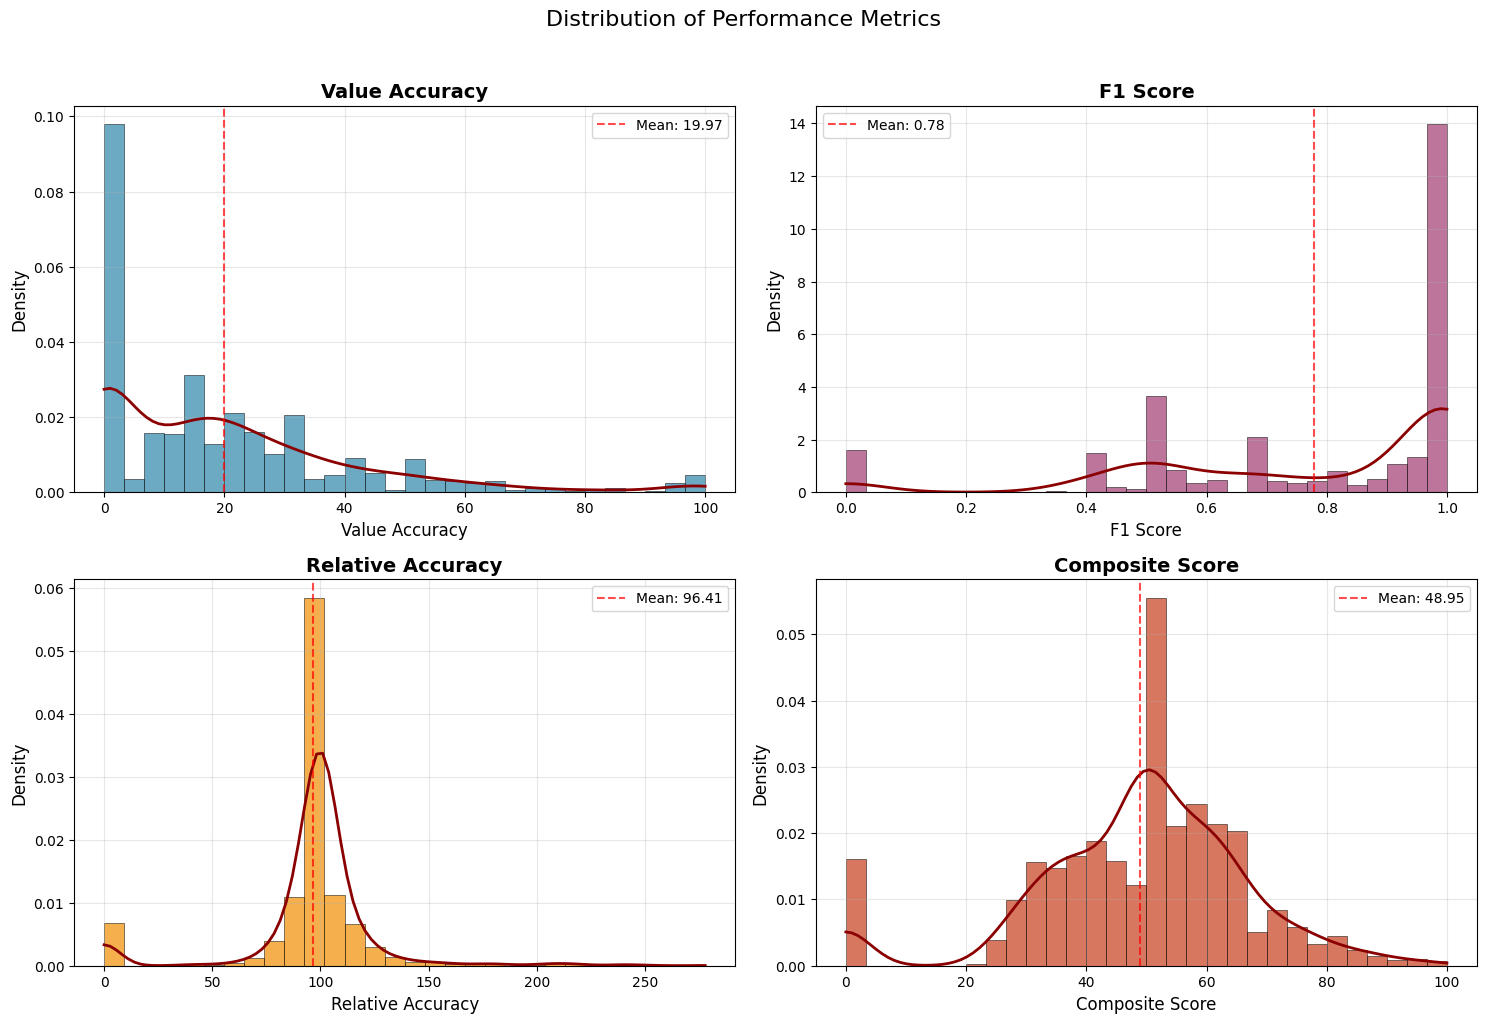

In [11]:
# Create subplots for metric distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Performance Metrics', fontsize=16, y=1.02)

metrics = ['value_accuracy', 'f1_score', 'relative_accuracy', 'composite_score']
axes = axes.flatten()

for i, metric in enumerate(metrics):
    # Get the data
    data = df[metric].dropna()
    
    if len(data) > 0:
        # Histogram
        n, bins, patches = axes[i].hist(data, bins=30, alpha=0.7, color=colors[i], 
                                       density=True, edgecolor='black', linewidth=0.5)
        
        # Add KDE curve if we have enough data points
        if len(data) > 10:
            try:
                x_range = np.linspace(data.min(), data.max(), 100)
                kde = stats.gaussian_kde(data)
                axes[i].plot(x_range, kde(x_range), color='darkred', linewidth=2)
            except:
                pass
        
        axes[i].set_title(f'{metric.replace("_", " ").title()}', fontweight='bold')
        axes[i].set_xlabel(metric.replace("_", " ").title())
        axes[i].set_ylabel('Density')
        axes[i].grid(True, alpha=0.3)
        
        # Add mean line
        mean_val = data.mean()
        axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.7, 
                       label=f'Mean: {mean_val:.2f}')
        axes[i].legend()
    else:
        axes[i].text(0.5, 0.5, 'No Data Available', ha='center', va='center', 
                    transform=axes[i].transAxes, fontsize=14)

plt.tight_layout()
plt.show()

### Performance by Chart Type Analysis

In [12]:
# Extract chart complexity from chart_id
df['chart_complexity'] = df['chart_id'].str.extract(r'_(complex|medium|simple)_')

# Performance metrics summary table
summary_stats = df.groupby(['is_original', 'perturbation_type', 'intensity']).agg({
    'value_accuracy': ['mean', 'std', 'count'],
    'f1_score': ['mean', 'std'],
    'relative_accuracy': ['mean', 'std'],
    'composite_score': ['mean', 'std']
}).round(3)

print("Performance Metrics by Condition:")
print("=" * 80)
print(summary_stats)

Performance Metrics by Condition:
Empty DataFrame
Columns: [(value_accuracy, mean), (value_accuracy, std), (value_accuracy, count), (f1_score, mean), (f1_score, std), (relative_accuracy, mean), (relative_accuracy, std), (composite_score, mean), (composite_score, std)]
Index: []


### Original vs Perturbed Charts Comparison

FINAL DEBUG:
Total rows: 1400
Unique is_original values: ['True', 'False']
Status counts: {'success': np.int64(1392), 'missing': np.int64(5), 'inconsistent': np.int64(2), 'failed': np.int64(1)}
Boolean conversion result: {False: np.int64(1200), True: np.int64(200)}
Success rows: 1392
Original: 198, Perturbed: 1194
value_accuracy: orig=198, pert=1194
f1_score: orig=198, pert=1194
relative_accuracy: orig=198, pert=1194
composite_score: orig=198, pert=1194


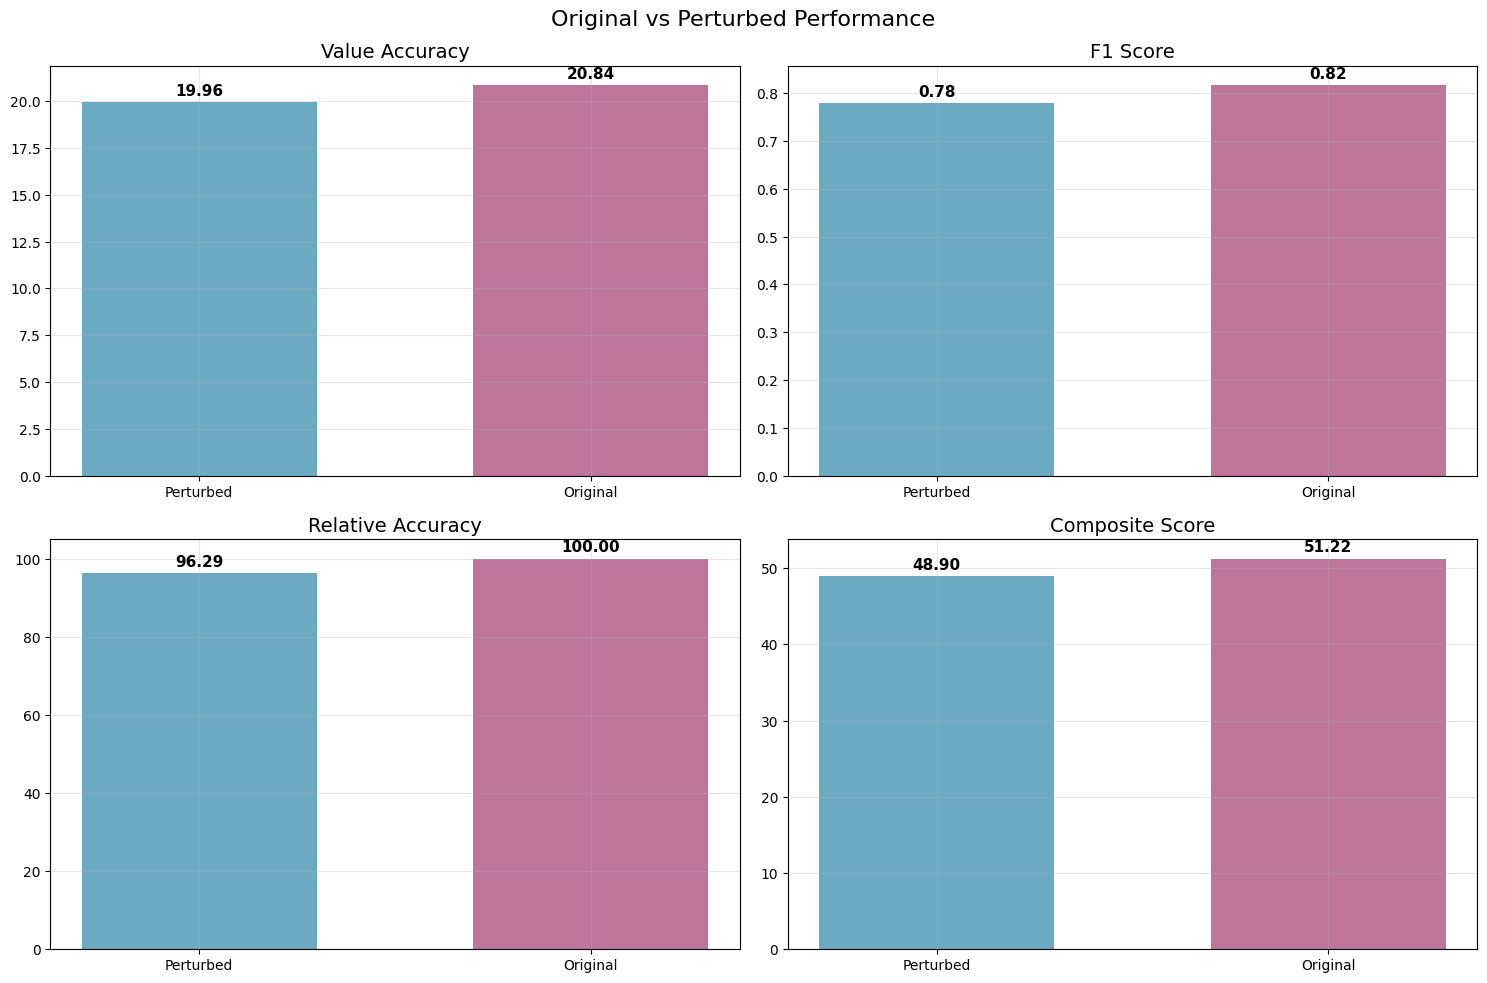


ACTUAL RESULTS:
value_accuracy: Original=20.839, Perturbed=19.960
f1_score: Original=0.816, Perturbed=0.778
relative_accuracy: Original=100.000, Perturbed=96.292
composite_score: Original=51.216, Perturbed=48.902


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Force reload the data with explicit settings
df = pd.read_csv('comprehensive_evaluation_results.csv', dtype={'is_original': str})

# Debug what we actually have
print("FINAL DEBUG:")
print(f"Total rows: {len(df)}")
print(f"Unique is_original values: {list(df['is_original'].unique())}")
print(f"Status counts: {dict(df['status'].value_counts())}")

# Convert to boolean using the actual string values we see
df['is_orig_bool'] = df['is_original'].map({'True': True, 'False': False})
print(f"Boolean conversion result: {dict(df['is_orig_bool'].value_counts())}")

# Get successful data
success_df = df[df['status'] == 'success']
print(f"Success rows: {len(success_df)}")

# Get the actual numbers
orig_count = len(success_df[success_df['is_orig_bool'] == True])
pert_count = len(success_df[success_df['is_orig_bool'] == False])
print(f"Original: {orig_count}, Perturbed: {pert_count}")

# Create the plot with GUARANTEED data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

metrics = ['value_accuracy', 'f1_score', 'relative_accuracy', 'composite_score']
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']

for i, metric in enumerate(metrics):
    # Get data using our boolean column
    orig_vals = success_df[success_df['is_orig_bool'] == True][metric].values
    pert_vals = success_df[success_df['is_orig_bool'] == False][metric].values
    
    print(f"{metric}: orig={len(orig_vals)}, pert={len(pert_vals)}")
    
    if len(orig_vals) > 0 and len(pert_vals) > 0:
        # Create simple bar chart
        means = [np.mean(pert_vals), np.mean(orig_vals)]
        axes[i].bar([0, 1], means, color=colors[:2], alpha=0.7, width=0.6)
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(['Perturbed', 'Original'])
        
        # Add values on bars
        for j, val in enumerate(means):
            axes[i].text(j, val + val*0.01, f'{val:.2f}', ha='center', va='bottom', fontweight='bold')
    
    axes[i].set_title(metric.replace('_', ' ').title())
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Original vs Perturbed Performance', fontsize=16)
plt.tight_layout()
plt.show()

# Print the actual means
print("\nACTUAL RESULTS:")
for metric in metrics:
    orig_vals = success_df[success_df['is_orig_bool'] == True][metric]
    pert_vals = success_df[success_df['is_orig_bool'] == False][metric]
    print(f"{metric}: Original={orig_vals.mean():.3f}, Perturbed={pert_vals.mean():.3f}")

### Perturbation Type Analysis

PERTURBATION TYPE ANALYSIS
Total perturbed charts: 1194

Perturbation types: ['shift', 'blur', 'conversion', 'corruption', 'blocks', 'rotation']
Perturbation type counts:
{'shift': np.int64(200), 'blur': np.int64(200), 'blocks': np.int64(200), 'corruption': np.int64(199), 'rotation': np.int64(198), 'conversion': np.int64(197)}


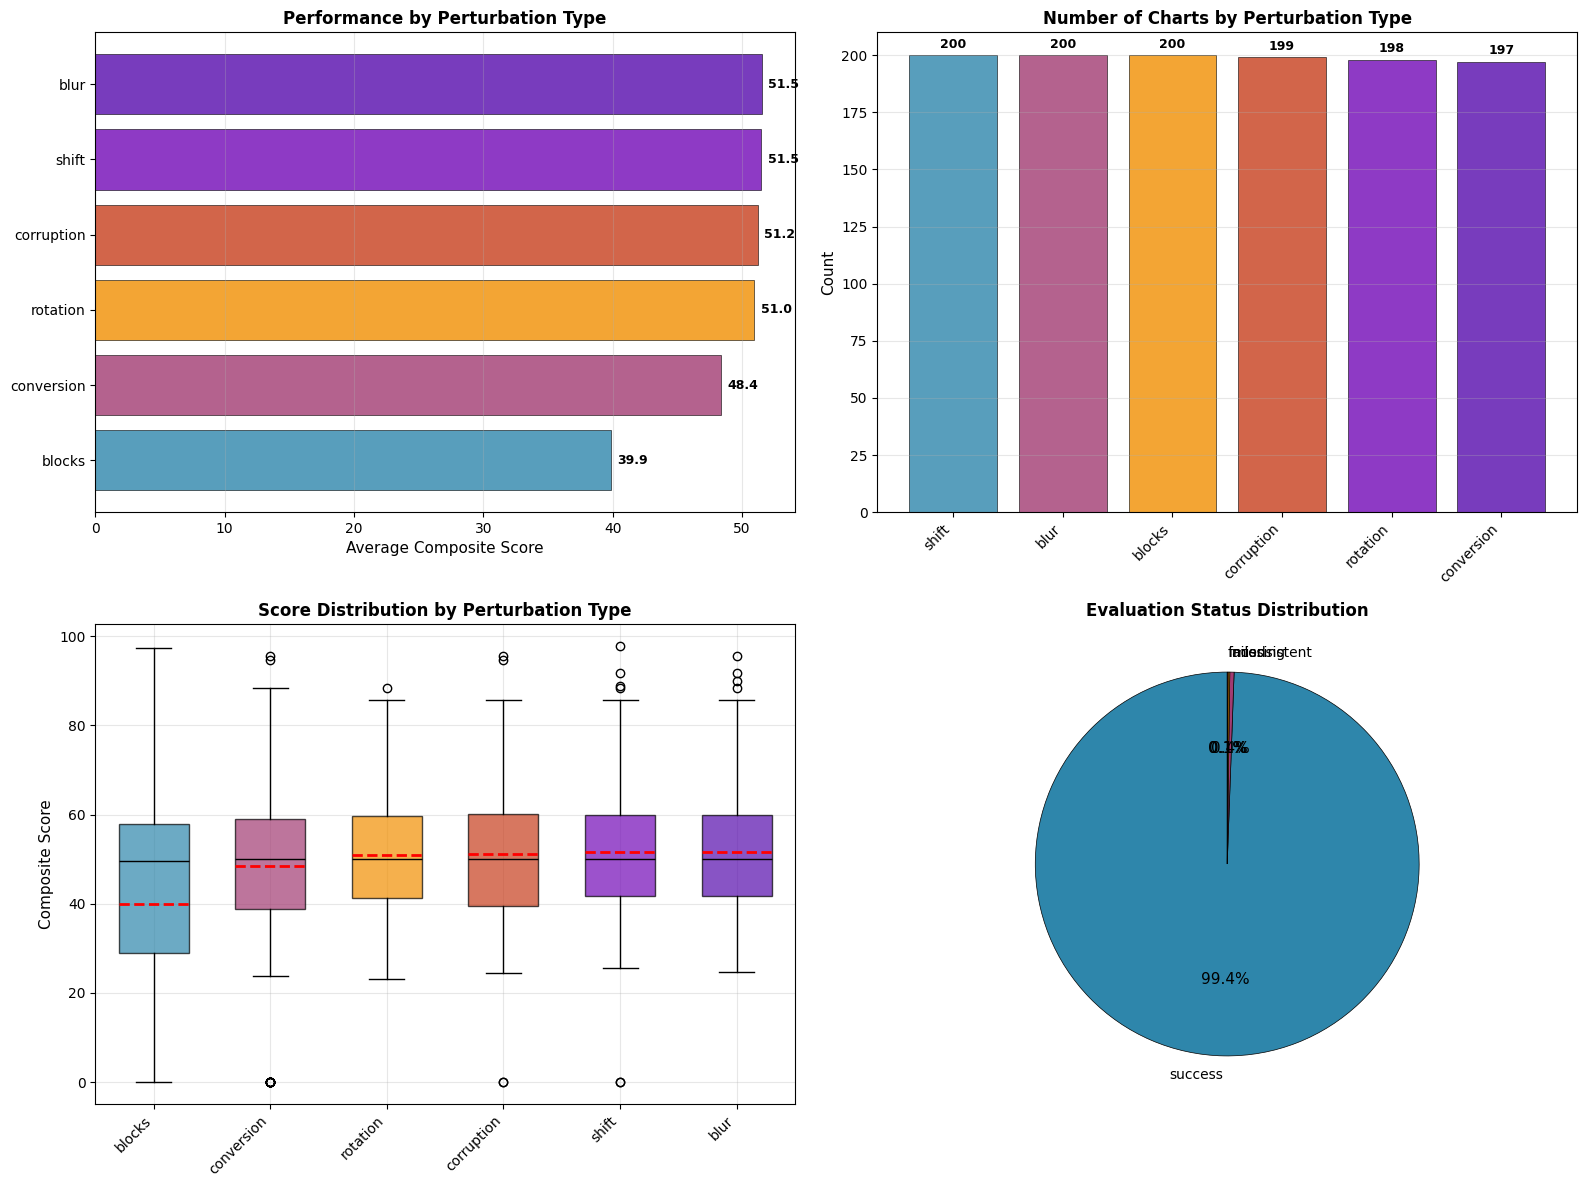


DETAILED PERTURBATION STATISTICS:

BLOCKS: (200 charts)
  value_accuracy: mean=15.164, std=20.695
  f1_score: mean=0.645, std=0.402
  relative_accuracy: mean=81.290, std=55.053
  composite_score: mean=39.850, std=25.400

CONVERSION: (197 charts)
  value_accuracy: mean=19.358, std=22.004
  f1_score: mean=0.774, std=0.293
  relative_accuracy: mean=96.586, std=37.970
  composite_score: mean=48.380, std=18.783

ROTATION: (198 charts)
  value_accuracy: mean=20.341, std=21.581
  f1_score: mean=0.816, std=0.227
  relative_accuracy: mean=99.369, std=22.730
  composite_score: mean=50.968, std=14.207

CORRUPTION: (199 charts)
  value_accuracy: mean=21.770, std=22.187
  f1_score: mean=0.807, std=0.221
  relative_accuracy: mean=100.379, std=25.129
  composite_score: mean=51.214, std=14.915

SHIFT: (200 charts)
  value_accuracy: mean=21.765, std=22.189
  f1_score: mean=0.812, std=0.236
  relative_accuracy: mean=100.261, std=24.021
  composite_score: mean=51.506, std=15.023

BLUR: (200 charts)
  va

In [16]:
# Perturbation Type Analysis
print("PERTURBATION TYPE ANALYSIS")
print("=" * 50)

# Get perturbed data only
perturbed_df = success_df[success_df['is_orig_bool'] == False].copy()
print(f"Total perturbed charts: {len(perturbed_df)}")

# Check perturbation types
print(f"\nPerturbation types: {list(perturbed_df['perturbation_type'].unique())}")
print(f"Perturbation type counts:")
print(dict(perturbed_df['perturbation_type'].value_counts()))

# Create comprehensive perturbation analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
colors_extended = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#7209B7', '#560BAD', '#480CA8']

# 1. Performance by perturbation type
perf_by_type = perturbed_df.groupby('perturbation_type')['composite_score'].mean().sort_values(ascending=True)
bars = axes[0,0].barh(range(len(perf_by_type)), perf_by_type.values, 
                     color=colors_extended[:len(perf_by_type)], alpha=0.8, 
                     edgecolor='black', linewidth=0.5)
axes[0,0].set_yticks(range(len(perf_by_type)))
axes[0,0].set_yticklabels(perf_by_type.index, fontsize=10)
axes[0,0].set_xlabel('Average Composite Score', fontsize=11)
axes[0,0].set_title('Performance by Perturbation Type', fontsize=12, fontweight='bold')
axes[0,0].grid(True, alpha=0.3, axis='x')

# Add value labels
for i, v in enumerate(perf_by_type.values):
    axes[0,0].text(v + 0.5, i, f'{v:.1f}', va='center', fontsize=9, fontweight='bold')

# 2. Count by perturbation type
type_counts = perturbed_df['perturbation_type'].value_counts()
bars = axes[0,1].bar(range(len(type_counts)), type_counts.values, 
                    color=colors_extended[:len(type_counts)], alpha=0.8,
                    edgecolor='black', linewidth=0.5)
axes[0,1].set_xticks(range(len(type_counts)))
axes[0,1].set_xticklabels(type_counts.index, rotation=45, ha='right', fontsize=10)
axes[0,1].set_ylabel('Count', fontsize=11)
axes[0,1].set_title('Number of Charts by Perturbation Type', fontsize=12, fontweight='bold')
axes[0,1].grid(True, alpha=0.3, axis='y')

# Add value labels
for i, v in enumerate(type_counts.values):
    axes[0,1].text(i, v + max(type_counts.values)*0.01, str(v), 
                  ha='center', va='bottom', fontsize=9, fontweight='bold')

# 3. Box plot of performance by perturbation type
pert_types = list(perf_by_type.index)
plot_data = [perturbed_df[perturbed_df['perturbation_type'] == pt]['composite_score'].values 
             for pt in pert_types]

bp = axes[1,0].boxplot(plot_data, labels=pert_types, patch_artist=True, 
                      widths=0.6, showmeans=True, meanline=True)

# Color the boxes
for i, patch in enumerate(bp['boxes']):
    patch.set_facecolor(colors_extended[i])
    patch.set_alpha(0.7)
    patch.set_edgecolor('black')

# Style elements
for element in ['whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(bp[element], color='black')
plt.setp(bp['means'], color='red', linewidth=2)

axes[1,0].set_xticklabels(pert_types, rotation=45, ha='right', fontsize=10)
axes[1,0].set_ylabel('Composite Score', fontsize=11)
axes[1,0].set_title('Score Distribution by Perturbation Type', fontsize=12, fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# 4. Overall status distribution
status_counts = df['status'].value_counts()
wedges, texts, autotexts = axes[1,1].pie(status_counts.values, labels=status_counts.index, 
                                        autopct='%1.1f%%', startangle=90, 
                                        colors=colors_extended[:len(status_counts)],
                                        wedgeprops=dict(edgecolor='black', linewidth=0.5))
axes[1,1].set_title('Evaluation Status Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed statistics
print(f"\nDETAILED PERTURBATION STATISTICS:")
print("=" * 60)
for pert_type in perf_by_type.index:
    subset = perturbed_df[perturbed_df['perturbation_type'] == pert_type]
    print(f"\n{pert_type.upper()}: ({len(subset)} charts)")
    for metric in metrics:
        vals = subset[metric]
        print(f"  {metric}: mean={vals.mean():.3f}, std={vals.std():.3f}")

### Correlation Analysis

CORRELATION ANALYSIS
Correlation Matrix:
                   value_accuracy  f1_score  relative_accuracy  \
value_accuracy              1.000    -0.005              0.281   
f1_score                   -0.005     1.000              0.508   
relative_accuracy           0.281     0.508              1.000   
composite_score             0.621     0.781              0.574   

                   composite_score  
value_accuracy               0.621  
f1_score                     0.781  
relative_accuracy            0.574  
composite_score              1.000  


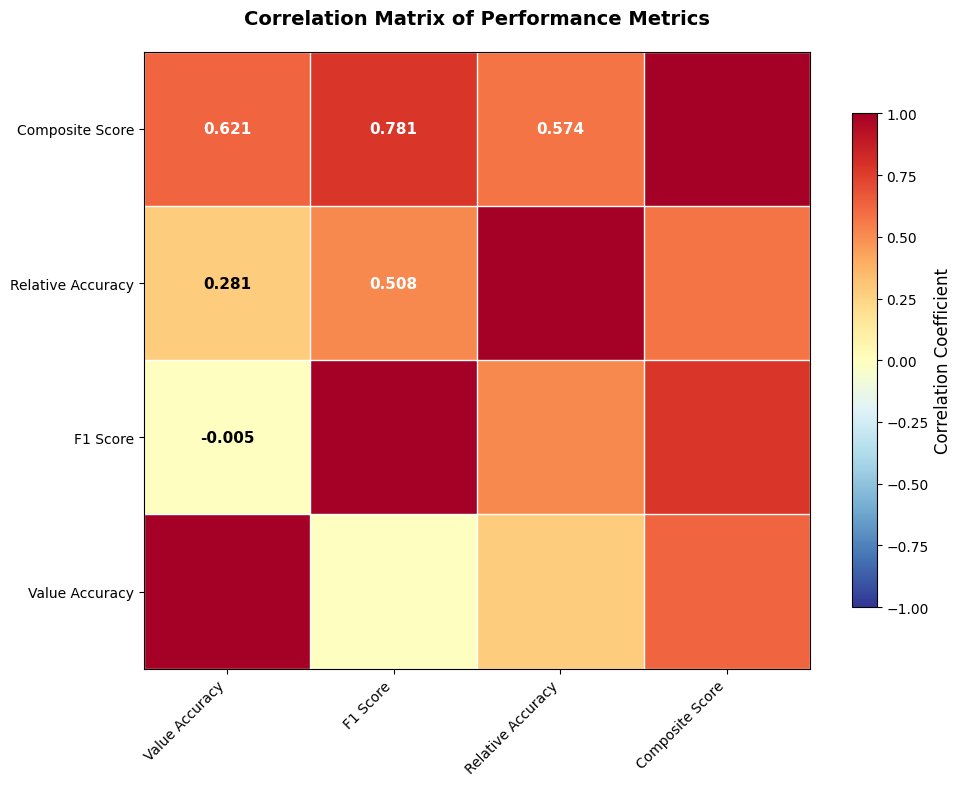


STRONGEST CORRELATIONS:
f1_score <-> composite_score: 0.781
value_accuracy <-> composite_score: 0.621
relative_accuracy <-> composite_score: 0.574
f1_score <-> relative_accuracy: 0.508
value_accuracy <-> relative_accuracy: 0.281
value_accuracy <-> f1_score: -0.005


In [17]:
# Correlation Analysis
print("CORRELATION ANALYSIS")
print("=" * 50)

# Calculate correlations for successful evaluations
numeric_cols = ['value_accuracy', 'f1_score', 'relative_accuracy', 'composite_score']
correlation_matrix = success_df[numeric_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix.round(3))

# Create correlation heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Create mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate heatmap
im = ax.imshow(correlation_matrix, cmap='RdYlBu_r', aspect='auto', vmin=-1, vmax=1)

# Add colorbar
cbar = plt.colorbar(im, ax=ax, shrink=0.8)
cbar.set_label('Correlation Coefficient', fontsize=12)

# Set ticks and labels
ax.set_xticks(range(len(numeric_cols)))
ax.set_yticks(range(len(numeric_cols)))
ax.set_xticklabels([col.replace('_', ' ').title() for col in numeric_cols], 
                   rotation=45, ha='right', fontsize=10)
ax.set_yticklabels([col.replace('_', ' ').title() for col in numeric_cols], fontsize=10)

# Add correlation values as text
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        if not mask[i, j]:  # Only show lower triangle
            text = ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.3f}',
                         ha="center", va="center", color="black" if abs(correlation_matrix.iloc[i, j]) < 0.5 else "white",
                         fontsize=11, fontweight='bold')

ax.set_title('Correlation Matrix of Performance Metrics', fontsize=14, fontweight='bold', pad=20)

# Add grid
ax.set_xlim(-0.5, len(numeric_cols)-0.5)
ax.set_ylim(-0.5, len(numeric_cols)-0.5)

# Add subtle grid lines
for i in range(len(numeric_cols)+1):
    ax.axhline(i-0.5, color='white', linewidth=1)
    ax.axvline(i-0.5, color='white', linewidth=1)

plt.tight_layout()
plt.show()

# Identify strongest correlations
print(f"\nSTRONGEST CORRELATIONS:")
print("=" * 40)
corr_pairs = []
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        corr_val = correlation_matrix.iloc[i, j]
        corr_pairs.append((numeric_cols[i], numeric_cols[j], corr_val))

corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
for metric1, metric2, corr in corr_pairs:
    print(f"{metric1} <-> {metric2}: {corr:.3f}")

### Performance Distribution Analysis

PERFORMANCE DISTRIBUTION ANALYSIS


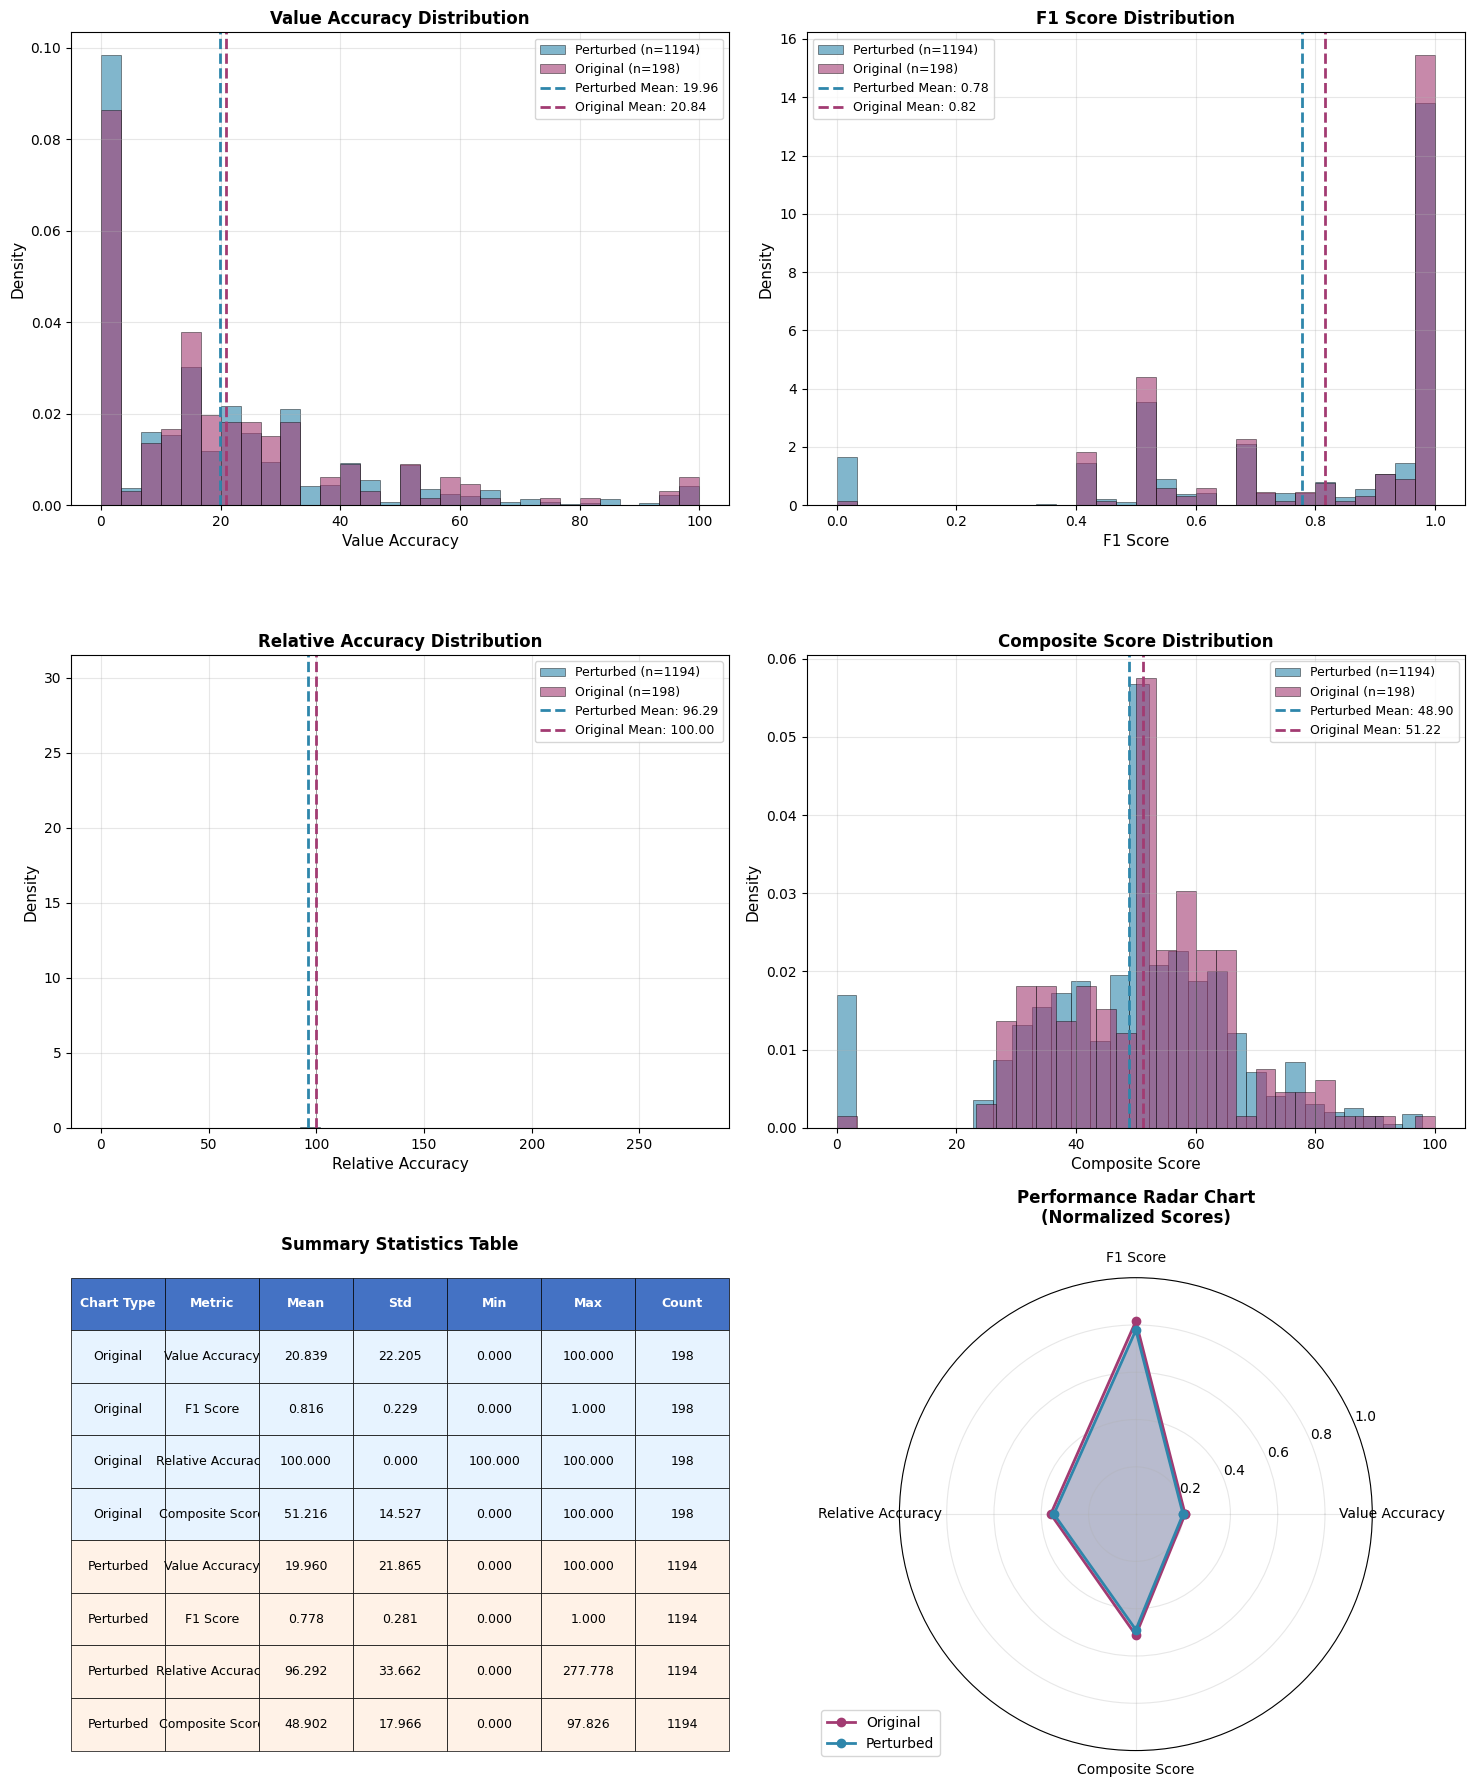

In [18]:
# Performance Distribution Analysis
print("PERFORMANCE DISTRIBUTION ANALYSIS")
print("=" * 50)

# Create comprehensive distribution plots
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.flatten()

metrics = ['value_accuracy', 'f1_score', 'relative_accuracy', 'composite_score']

for i, metric in enumerate(metrics):
    # Distribution comparison
    orig_data = success_df[success_df['is_orig_bool'] == True][metric].values
    pert_data = success_df[success_df['is_orig_bool'] == False][metric].values
    
    # Histogram with overlays
    axes[i].hist(pert_data, bins=30, alpha=0.6, label=f'Perturbed (n={len(pert_data)})', 
                color=colors[0], density=True, edgecolor='black', linewidth=0.5)
    axes[i].hist(orig_data, bins=30, alpha=0.6, label=f'Original (n={len(orig_data)})', 
                color=colors[1], density=True, edgecolor='black', linewidth=0.5)
    
    # Add mean lines
    axes[i].axvline(np.mean(pert_data), color=colors[0], linestyle='--', linewidth=2, 
                   label=f'Perturbed Mean: {np.mean(pert_data):.2f}')
    axes[i].axvline(np.mean(orig_data), color=colors[1], linestyle='--', linewidth=2,
                   label=f'Original Mean: {np.mean(orig_data):.2f}')
    
    axes[i].set_title(f'{metric.replace("_", " ").title()} Distribution', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(metric.replace("_", " ").title(), fontsize=11)
    axes[i].set_ylabel('Density', fontsize=11)
    axes[i].legend(fontsize=9)
    axes[i].grid(True, alpha=0.3)

# Statistical summary table
axes[4].axis('off')
summary_data = []
for chart_type, is_orig in [('Original', True), ('Perturbed', False)]:
    subset = success_df[success_df['is_orig_bool'] == is_orig]
    for metric in metrics:
        values = subset[metric]
        summary_data.append([
            chart_type,
            metric.replace('_', ' ').title(),
            f'{values.mean():.3f}',
            f'{values.std():.3f}',
            f'{values.min():.3f}',
            f'{values.max():.3f}',
            str(len(values))
        ])

table = axes[4].table(cellText=summary_data,
                     colLabels=['Chart Type', 'Metric', 'Mean', 'Std', 'Min', 'Max', 'Count'],
                     cellLoc='center',
                     loc='center',
                     bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.5)

# Style the table
for i in range(len(summary_data) + 1):
    for j in range(7):
        cell = table[(i, j)]
        if i == 0:  # Header
            cell.set_facecolor('#4472C4')
            cell.set_text_props(weight='bold', color='white')
        elif 'Original' in summary_data[i-1][0] if i > 0 else False:
            cell.set_facecolor('#E7F3FF')
        else:
            cell.set_facecolor('#FFF2E7')
        cell.set_edgecolor('black')
        cell.set_linewidth(0.5)

axes[4].set_title('Summary Statistics Table', fontsize=12, fontweight='bold', pad=20)

# Performance comparison radar chart
axes[5].remove()
ax_radar = fig.add_subplot(3, 2, 6, projection='polar')

# Normalize metrics to 0-1 scale for radar chart
metrics_normalized = []
orig_means_norm = []
pert_means_norm = []

for metric in metrics:
    orig_vals = success_df[success_df['is_orig_bool'] == True][metric]
    pert_vals = success_df[success_df['is_orig_bool'] == False][metric]
    
    all_vals = np.concatenate([orig_vals, pert_vals])
    min_val, max_val = all_vals.min(), all_vals.max()
    
    orig_norm = (orig_vals.mean() - min_val) / (max_val - min_val) if max_val > min_val else 0.5
    pert_norm = (pert_vals.mean() - min_val) / (max_val - min_val) if max_val > min_val else 0.5
    
    orig_means_norm.append(orig_norm)
    pert_means_norm.append(pert_norm)
    metrics_normalized.append(metric.replace('_', ' ').title())

# Add first point at the end to close the radar chart
orig_means_norm.append(orig_means_norm[0])
pert_means_norm.append(pert_means_norm[0])

angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles.append(angles[0])

ax_radar.plot(angles, orig_means_norm, 'o-', linewidth=2, label='Original', color=colors[1])
ax_radar.fill(angles, orig_means_norm, alpha=0.25, color=colors[1])
ax_radar.plot(angles, pert_means_norm, 'o-', linewidth=2, label='Perturbed', color=colors[0])
ax_radar.fill(angles, pert_means_norm, alpha=0.25, color=colors[0])

ax_radar.set_xticks(angles[:-1])
ax_radar.set_xticklabels(metrics_normalized, fontsize=10)
ax_radar.set_ylim(0, 1)
ax_radar.set_title('Performance Radar Chart\n(Normalized Scores)', fontsize=12, fontweight='bold', pad=20)
ax_radar.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
ax_radar.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 10A: Distribution Plots Only

PERFORMANCE DISTRIBUTION ANALYSIS


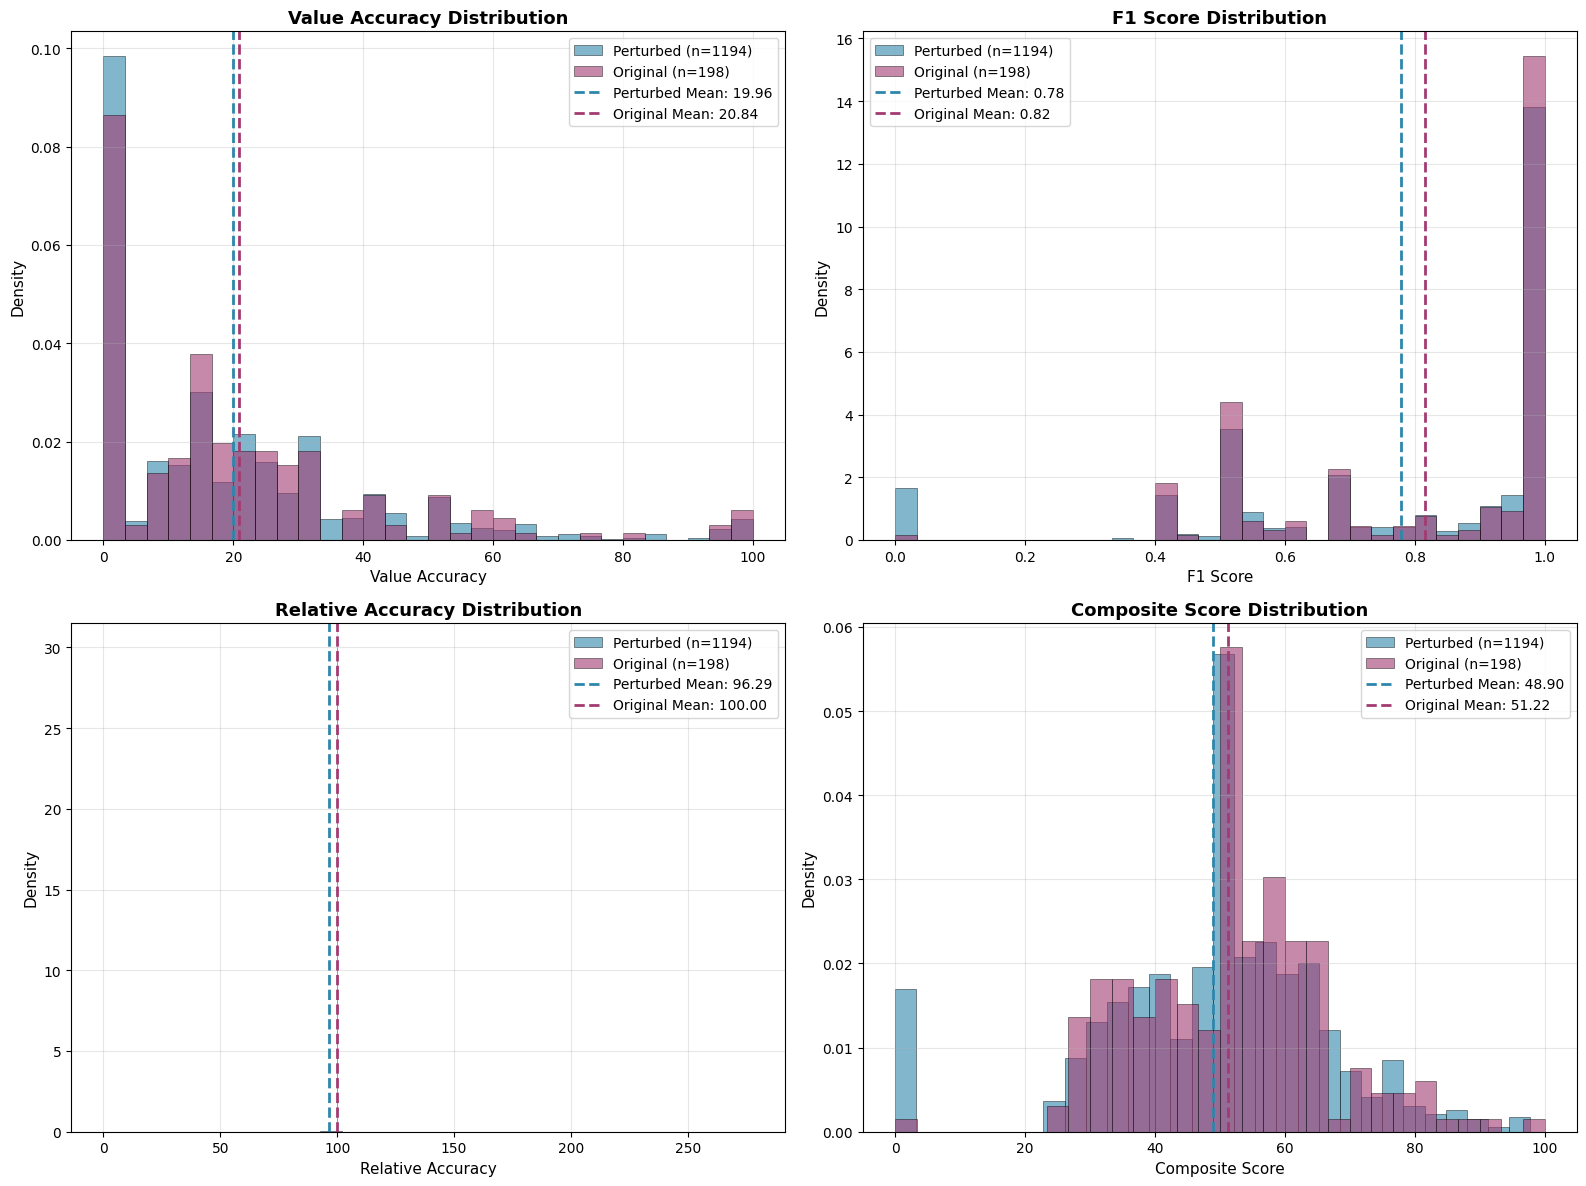

In [19]:
# Performance Distribution Analysis - Distribution Plots
print("PERFORMANCE DISTRIBUTION ANALYSIS")
print("=" * 50)

# Create distribution plots with better spacing
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

metrics = ['value_accuracy', 'f1_score', 'relative_accuracy', 'composite_score']

for i, metric in enumerate(metrics):
    # Distribution comparison
    orig_data = success_df[success_df['is_orig_bool'] == True][metric].values
    pert_data = success_df[success_df['is_orig_bool'] == False][metric].values
    
    # Histogram with overlays
    axes[i].hist(pert_data, bins=30, alpha=0.6, label=f'Perturbed (n={len(pert_data)})', 
                color=colors[0], density=True, edgecolor='black', linewidth=0.5)
    axes[i].hist(orig_data, bins=30, alpha=0.6, label=f'Original (n={len(orig_data)})', 
                color=colors[1], density=True, edgecolor='black', linewidth=0.5)
    
    # Add mean lines
    axes[i].axvline(np.mean(pert_data), color=colors[0], linestyle='--', linewidth=2, 
                   label=f'Perturbed Mean: {np.mean(pert_data):.2f}')
    axes[i].axvline(np.mean(orig_data), color=colors[1], linestyle='--', linewidth=2,
                   label=f'Original Mean: {np.mean(orig_data):.2f}')
    
    axes[i].set_title(f'{metric.replace("_", " ").title()} Distribution', fontsize=13, fontweight='bold')
    axes[i].set_xlabel(metric.replace("_", " ").title(), fontsize=11)
    axes[i].set_ylabel('Density', fontsize=11)
    axes[i].legend(fontsize=10, loc='best')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 10B: Summary Statistics Table


DETAILED SUMMARY STATISTICS TABLE


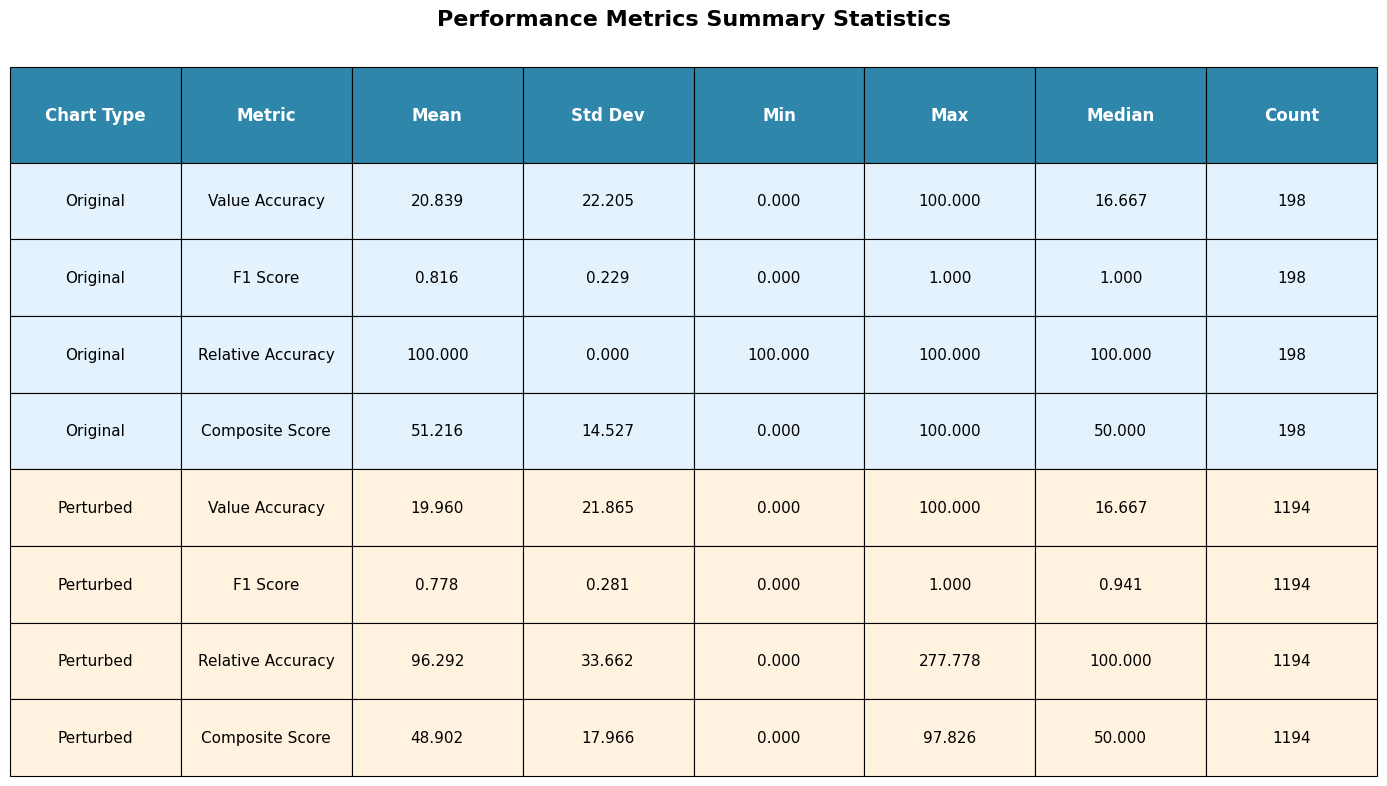


TEXT FORMAT TABLE:
Chart Type   Metric             Mean     Std      Min      Max      Median   Count 
----------------------------------------------------------------------------------------------------
Original     Value Accuracy     20.839   22.205   0.000    100.000  16.667   198   
Original     F1 Score           0.816    0.229    0.000    1.000    1.000    198   
Original     Relative Accuracy  100.000  0.000    100.000  100.000  100.000  198   
Original     Composite Score    51.216   14.527   0.000    100.000  50.000   198   
Perturbed    Value Accuracy     19.960   21.865   0.000    100.000  16.667   1194  
Perturbed    F1 Score           0.778    0.281    0.000    1.000    0.941    1194  
Perturbed    Relative Accuracy  96.292   33.662   0.000    277.778  100.000  1194  
Perturbed    Composite Score    48.902   17.966   0.000    97.826   50.000   1194  


In [20]:
# Summary Statistics Table - Full Space
print("DETAILED SUMMARY STATISTICS TABLE")
print("=" * 60)

# Create comprehensive summary table
summary_data = []
for chart_type, is_orig in [('Original', True), ('Perturbed', False)]:
    subset = success_df[success_df['is_orig_bool'] == is_orig]
    for metric in metrics:
        values = subset[metric]
        summary_data.append([
            chart_type,
            metric.replace('_', ' ').title(),
            f'{values.mean():.3f}',
            f'{values.std():.3f}',
            f'{values.min():.3f}',
            f'{values.max():.3f}',
            f'{values.median():.3f}',
            str(len(values))
        ])

# Create a large, readable table
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
ax.axis('off')

table = ax.table(cellText=summary_data,
                colLabels=['Chart Type', 'Metric', 'Mean', 'Std Dev', 'Min', 'Max', 'Median', 'Count'],
                cellLoc='center',
                loc='center',
                bbox=[0, 0, 1, 1])

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.2)  # Make table taller for better readability

# Style the table with better colors and spacing
for i in range(len(summary_data) + 1):
    for j in range(8):
        cell = table[(i, j)]
        if i == 0:  # Header
            cell.set_facecolor('#2E86AB')
            cell.set_text_props(weight='bold', color='white', fontsize=12)
            cell.set_height(0.15)
        else:
            if 'Original' in summary_data[i-1][0]:
                cell.set_facecolor('#E3F2FD')  # Light blue for original
            else:
                cell.set_facecolor('#FFF3E0')  # Light orange for perturbed
            cell.set_height(0.12)
        
        cell.set_edgecolor('black')
        cell.set_linewidth(0.8)

ax.set_title('Performance Metrics Summary Statistics', fontsize=16, fontweight='bold', pad=30)

plt.tight_layout()
plt.show()

# Also print the table in text format for easy copying
print("\nTEXT FORMAT TABLE:")
print("=" * 100)
header = f"{'Chart Type':<12} {'Metric':<18} {'Mean':<8} {'Std':<8} {'Min':<8} {'Max':<8} {'Median':<8} {'Count':<6}"
print(header)
print("-" * 100)

for row in summary_data:
    formatted_row = f"{row[0]:<12} {row[1]:<18} {row[2]:<8} {row[3]:<8} {row[4]:<8} {row[5]:<8} {row[6]:<8} {row[7]:<6}"
    print(formatted_row)

### 10C: Radar Chart Analysis

PERFORMANCE RADAR CHART ANALYSIS
Metric normalization details:
value_accuracy: Original=20.839 (0.208), Perturbed=19.960 (0.200)
f1_score: Original=0.816 (0.816), Perturbed=0.778 (0.778)
relative_accuracy: Original=100.000 (0.360), Perturbed=96.292 (0.347)
composite_score: Original=51.216 (0.512), Perturbed=48.902 (0.489)


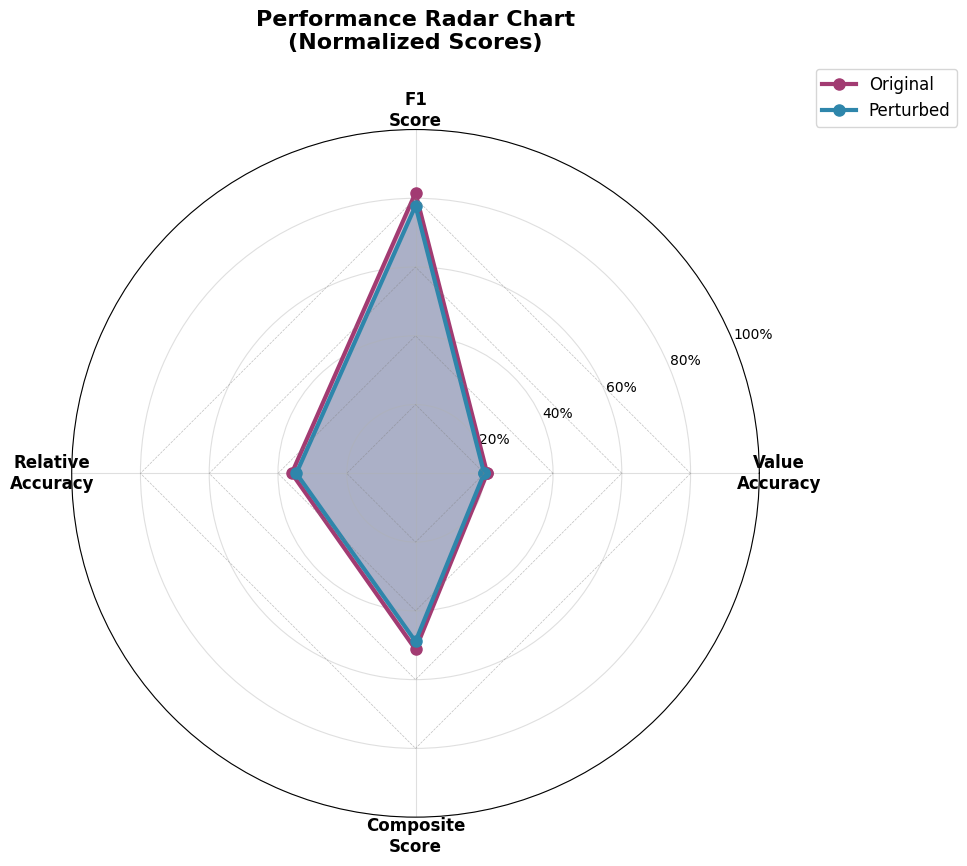


RAW PERFORMANCE VALUES:
Value Accuracy:
  Original: 20.839
  Perturbed: 19.960
  Difference: +0.879
F1 Score:
  Original: 0.816
  Perturbed: 0.778
  Difference: +0.037
Relative Accuracy:
  Original: 100.000
  Perturbed: 96.292
  Difference: +3.708
Composite Score:
  Original: 51.216
  Perturbed: 48.902
  Difference: +2.314


In [21]:
# Performance Radar Chart - Dedicated Space
print("PERFORMANCE RADAR CHART ANALYSIS")
print("=" * 50)

# Create large radar chart with better visibility
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Normalize metrics to 0-1 scale for radar chart
metrics_normalized = []
orig_means_norm = []
pert_means_norm = []
raw_means = {'Original': [], 'Perturbed': []}

print("Metric normalization details:")
for metric in metrics:
    orig_vals = success_df[success_df['is_orig_bool'] == True][metric]
    pert_vals = success_df[success_df['is_orig_bool'] == False][metric]
    
    orig_mean = orig_vals.mean()
    pert_mean = pert_vals.mean()
    
    raw_means['Original'].append(orig_mean)
    raw_means['Perturbed'].append(pert_mean)
    
    # Use global min/max for normalization
    all_vals = np.concatenate([orig_vals, pert_vals])
    min_val, max_val = all_vals.min(), all_vals.max()
    
    orig_norm = (orig_mean - min_val) / (max_val - min_val) if max_val > min_val else 0.5
    pert_norm = (pert_mean - min_val) / (max_val - min_val) if max_val > min_val else 0.5
    
    orig_means_norm.append(orig_norm)
    pert_means_norm.append(pert_norm)
    metrics_normalized.append(metric.replace('_', '\n').title())
    
    print(f"{metric}: Original={orig_mean:.3f} ({orig_norm:.3f}), Perturbed={pert_mean:.3f} ({pert_norm:.3f})")

# Close the radar chart
orig_means_norm.append(orig_means_norm[0])
pert_means_norm.append(pert_means_norm[0])

angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles.append(angles[0])

# Plot with enhanced styling
ax.plot(angles, orig_means_norm, 'o-', linewidth=3, label='Original', 
        color=colors[1], markersize=8)
ax.fill(angles, orig_means_norm, alpha=0.3, color=colors[1])

ax.plot(angles, pert_means_norm, 'o-', linewidth=3, label='Perturbed', 
        color=colors[0], markersize=8)
ax.fill(angles, pert_means_norm, alpha=0.3, color=colors[0])

# Customize the radar chart
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics_normalized, fontsize=12, fontweight='bold')
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'], fontsize=10)
ax.set_title('Performance Radar Chart\n(Normalized Scores)', fontsize=16, fontweight='bold', pad=30)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)
ax.grid(True, alpha=0.4)

# Add concentric circles for better readability
for y in [0.2, 0.4, 0.6, 0.8]:
    ax.plot(angles, [y] * len(angles), '--', alpha=0.5, color='gray', linewidth=0.5)

plt.tight_layout()
plt.show()

# Print raw values for reference
print(f"\nRAW PERFORMANCE VALUES:")
print("=" * 40)
for i, metric in enumerate(metrics):
    print(f"{metric.replace('_', ' ').title()}:")
    print(f"  Original: {raw_means['Original'][i]:.3f}")
    print(f"  Perturbed: {raw_means['Perturbed'][i]:.3f}")
    print(f"  Difference: {raw_means['Original'][i] - raw_means['Perturbed'][i]:+.3f}")

### 10D: Individual Metric Deep Dive

INDIVIDUAL METRIC DEEP DIVE

📊 ANALYZING VALUE ACCURACY


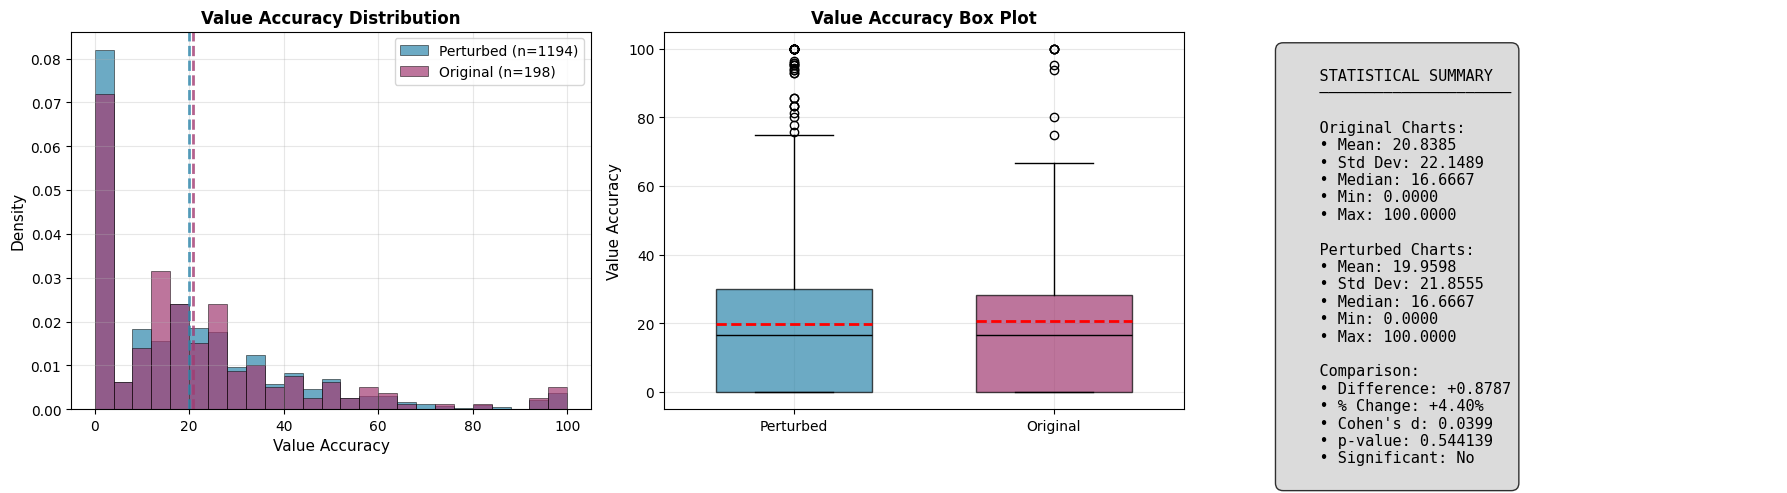

Key Insights for Value Accuracy:
• Original mean: 20.8385 vs Perturbed mean: 19.9598
• Performance difference: +0.8787
• Statistical significance: No (p=0.5441)
• Effect size: 0.040 (Negligible)

📊 ANALYZING F1 SCORE


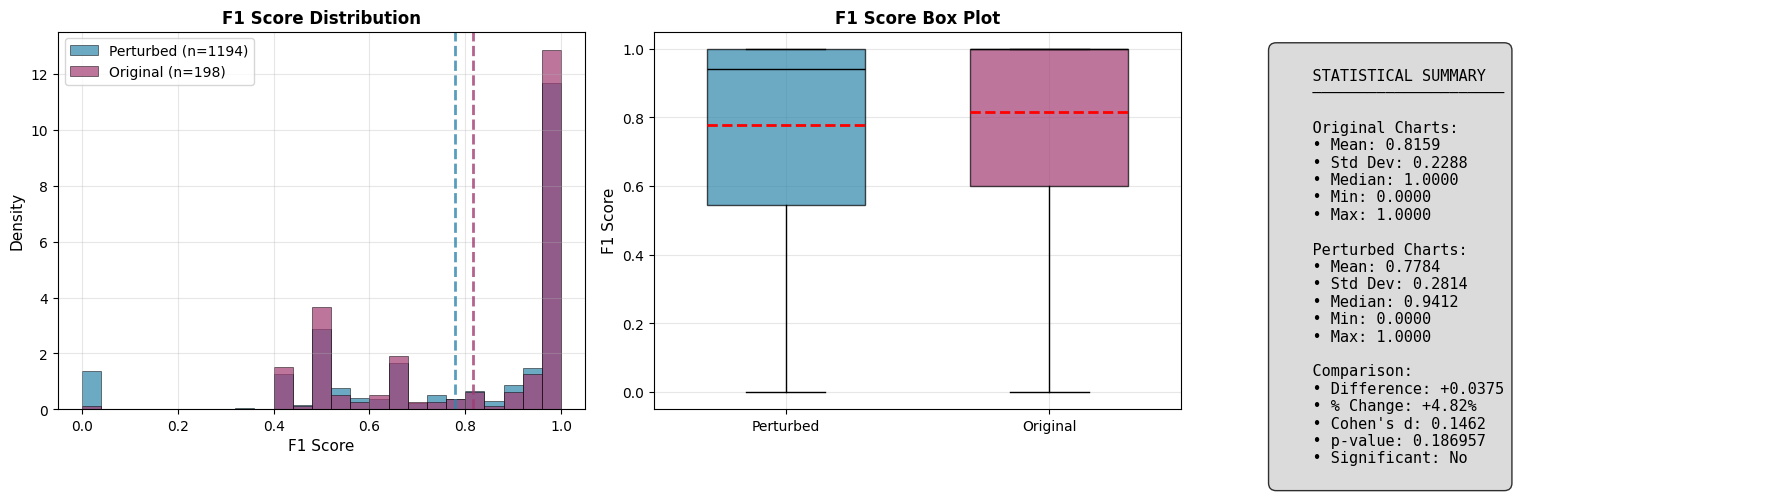

Key Insights for F1 Score:
• Original mean: 0.8159 vs Perturbed mean: 0.7784
• Performance difference: +0.0375
• Statistical significance: No (p=0.1870)
• Effect size: 0.146 (Negligible)

📊 ANALYZING RELATIVE ACCURACY


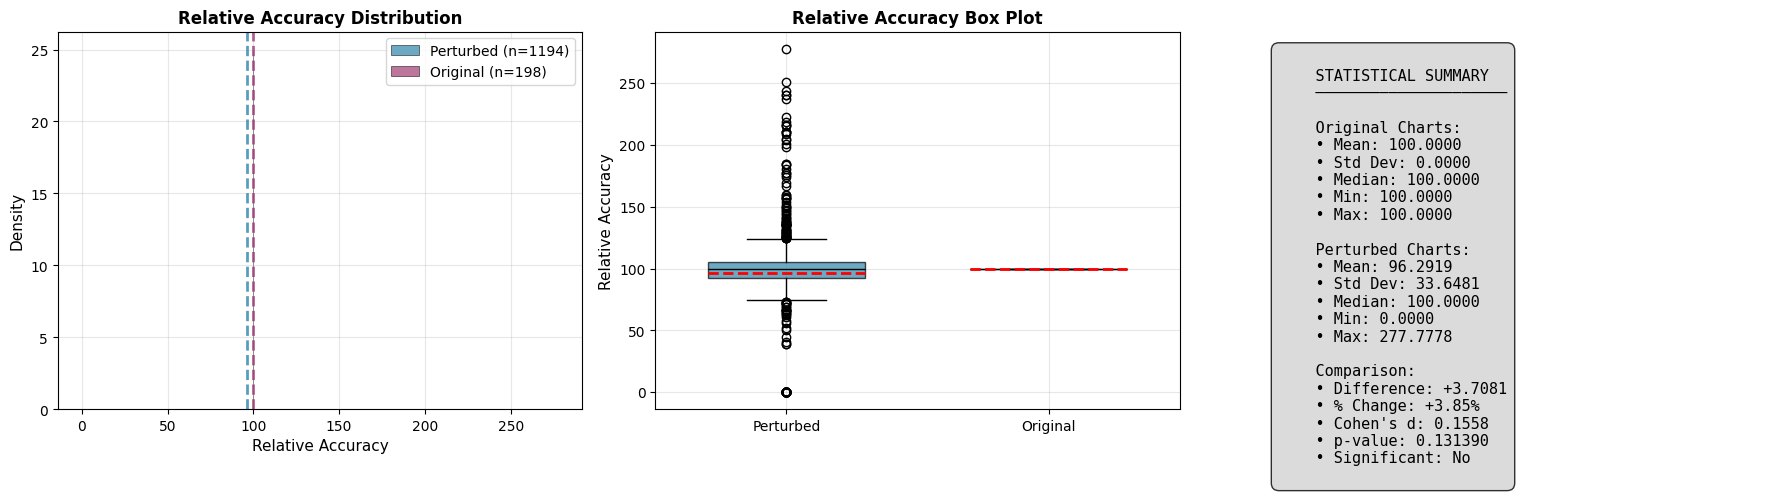

Key Insights for Relative Accuracy:
• Original mean: 100.0000 vs Perturbed mean: 96.2919
• Performance difference: +3.7081
• Statistical significance: No (p=0.1314)
• Effect size: 0.156 (Negligible)

📊 ANALYZING COMPOSITE SCORE


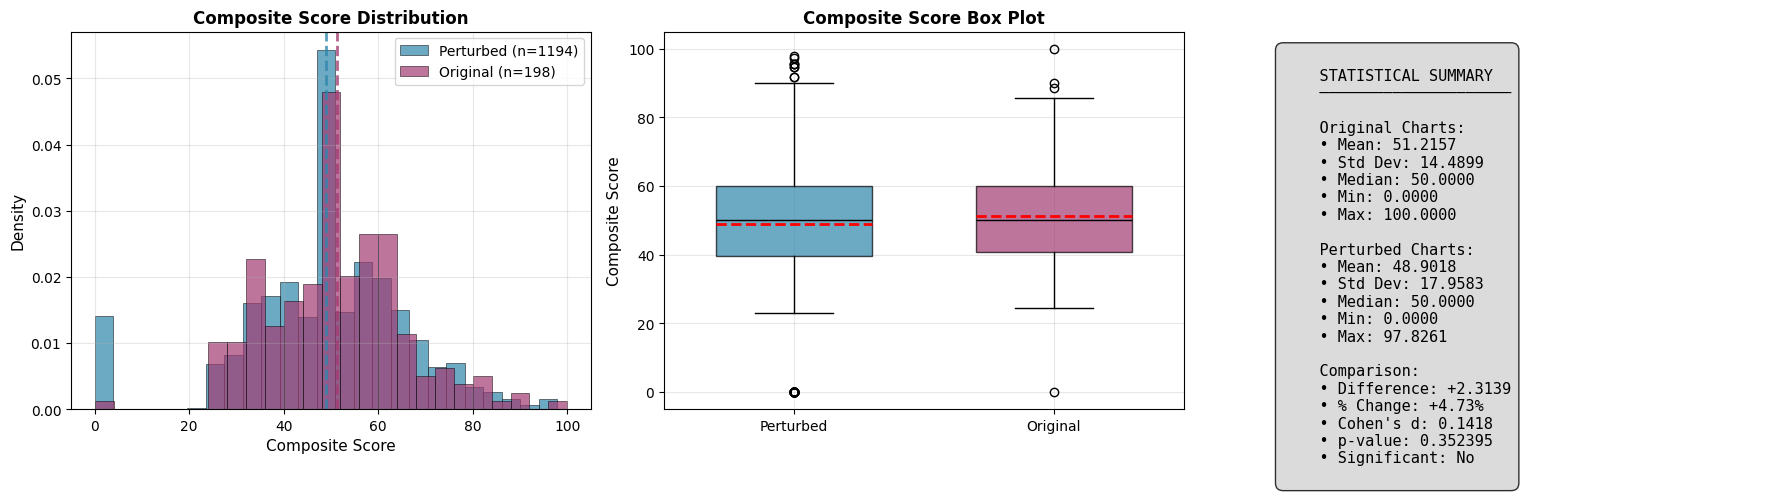

Key Insights for Composite Score:
• Original mean: 51.2157 vs Perturbed mean: 48.9018
• Performance difference: +2.3139
• Statistical significance: No (p=0.3524)
• Effect size: 0.142 (Negligible)


In [22]:
# Individual Metric Analysis - One by One
print("INDIVIDUAL METRIC DEEP DIVE")
print("=" * 50)

for metric in metrics:
    print(f"\n📊 ANALYZING {metric.replace('_', ' ').upper()}")
    print("=" * 60)
    
    orig_data = success_df[success_df['is_orig_bool'] == True][metric].values
    pert_data = success_df[success_df['is_orig_bool'] == False][metric].values
    
    # Create individual metric analysis
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # 1. Distribution comparison
    axes[0].hist(pert_data, bins=25, alpha=0.7, label=f'Perturbed (n={len(pert_data)})', 
                color=colors[0], density=True, edgecolor='black', linewidth=0.5)
    axes[0].hist(orig_data, bins=25, alpha=0.7, label=f'Original (n={len(orig_data)})', 
                color=colors[1], density=True, edgecolor='black', linewidth=0.5)
    
    axes[0].axvline(np.mean(pert_data), color=colors[0], linestyle='--', linewidth=2, alpha=0.8)
    axes[0].axvline(np.mean(orig_data), color=colors[1], linestyle='--', linewidth=2, alpha=0.8)
    
    axes[0].set_title(f'{metric.replace("_", " ").title()} Distribution', fontsize=12, fontweight='bold')
    axes[0].set_xlabel(metric.replace("_", " ").title(), fontsize=11)
    axes[0].set_ylabel('Density', fontsize=11)
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3)
    
    # 2. Box plot comparison
    bp = axes[1].boxplot([pert_data, orig_data], labels=['Perturbed', 'Original'], 
                        patch_artist=True, widths=0.6, showmeans=True, meanline=True)
    
    bp['boxes'][0].set_facecolor(colors[0])
    bp['boxes'][1].set_facecolor(colors[1])
    for box in bp['boxes']:
        box.set_alpha(0.7)
        box.set_edgecolor('black')
    
    for element in ['whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[element], color='black')
    plt.setp(bp['means'], color='red', linewidth=2)
    
    axes[1].set_title(f'{metric.replace("_", " ").title()} Box Plot', fontsize=12, fontweight='bold')
    axes[1].set_ylabel(metric.replace("_", " ").title(), fontsize=11)
    axes[1].grid(True, alpha=0.3)
    
    # 3. Statistical summary
    axes[2].axis('off')
    
    # Calculate statistics
    stat, p_value = stats.mannwhitneyu(orig_data, pert_data, alternative='two-sided')
    pooled_std = np.sqrt((np.var(orig_data) + np.var(pert_data)) / 2)
    cohens_d = (np.mean(orig_data) - np.mean(pert_data)) / pooled_std if pooled_std > 0 else 0
    
    # Create summary text
    summary_text = f"""
    STATISTICAL SUMMARY
    ─────────────────────
    
    Original Charts:
    • Mean: {np.mean(orig_data):.4f}
    • Std Dev: {np.std(orig_data):.4f}
    • Median: {np.median(orig_data):.4f}
    • Min: {np.min(orig_data):.4f}
    • Max: {np.max(orig_data):.4f}
    
    Perturbed Charts:
    • Mean: {np.mean(pert_data):.4f}
    • Std Dev: {np.std(pert_data):.4f}
    • Median: {np.median(pert_data):.4f}
    • Min: {np.min(pert_data):.4f}
    • Max: {np.max(pert_data):.4f}
    
    Comparison:
    • Difference: {np.mean(orig_data) - np.mean(pert_data):+.4f}
    • % Change: {((np.mean(orig_data) - np.mean(pert_data)) / np.mean(pert_data) * 100):+.2f}%
    • Cohen's d: {cohens_d:.4f}
    • p-value: {p_value:.6f}
    • Significant: {'Yes' if p_value < 0.05 else 'No'}
    """
    
    axes[2].text(0.05, 0.95, summary_text, transform=axes[2].transAxes, fontsize=11,
                verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Print key insights
    print(f"Key Insights for {metric.replace('_', ' ').title()}:")
    print(f"• Original mean: {np.mean(orig_data):.4f} vs Perturbed mean: {np.mean(pert_data):.4f}")
    print(f"• Performance difference: {np.mean(orig_data) - np.mean(pert_data):+.4f}")
    print(f"• Statistical significance: {'Yes (p={:.4f})'.format(p_value) if p_value < 0.05 else 'No (p={:.4f})'.format(p_value)}")
    print(f"• Effect size: {abs(cohens_d):.3f} ({'Large' if abs(cohens_d) > 0.8 else 'Medium' if abs(cohens_d) > 0.5 else 'Small' if abs(cohens_d) > 0.2 else 'Negligible'})")

### 11: Statistical Tests Summary

STATISTICAL TESTS SUMMARY
1. NORMALITY TESTS (Shapiro-Wilk)
----------------------------------------
value_accuracy:
  Original: W=0.8283, p=0.0000 (Non-normal)
  Perturbed: W=0.8334, p=0.0000 (Non-normal)
f1_score:
  Original: W=0.7592, p=0.0000 (Non-normal)
  Perturbed: W=0.7734, p=0.0000 (Non-normal)
relative_accuracy:
  Original: W=1.0000, p=1.0000 (Normal)
  Perturbed: W=0.7248, p=0.0000 (Non-normal)
composite_score:
  Original: W=0.9811, p=0.0090 (Non-normal)
  Perturbed: W=0.9449, p=0.0000 (Non-normal)

2. COMPARISON TESTS (Mann-Whitney U)
----------------------------------------
value_accuracy:
  U-statistic: 121330.0
  p-value: 0.544139 ns
  Cohen's d: 0.040 (negligible effect)
  Difference: +0.879
f1_score:
  U-statistic: 124749.5
  p-value: 0.186957 ns
  Cohen's d: 0.146 (negligible effect)
  Difference: +0.037
relative_accuracy:
  U-statistic: 125730.0
  p-value: 0.131390 ns
  Cohen's d: 0.156 (negligible effect)
  Difference: +3.708
composite_score:
  U-statistic: 123065.5

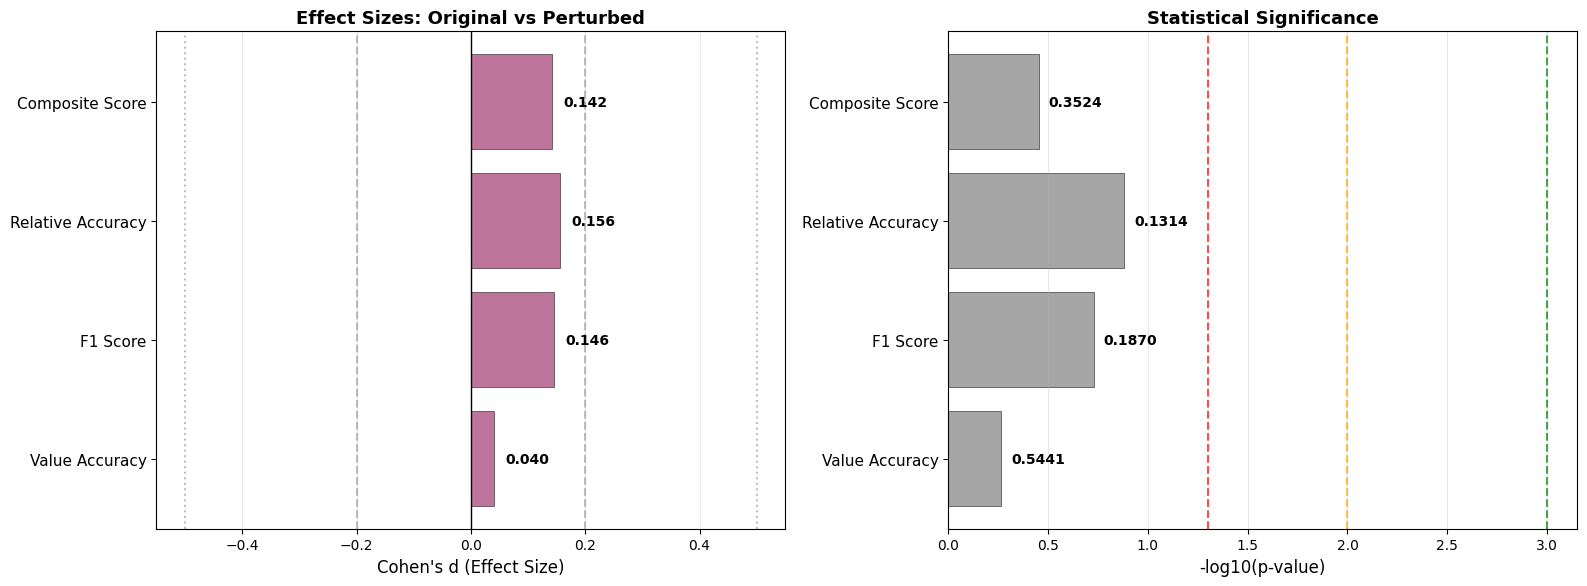


3. COMPREHENSIVE RESULTS SUMMARY
           Metric  Original_Mean  Perturbed_Mean  Difference  P_Value  Cohens_D Effect_Size Significance
   Value Accuracy         20.839          19.960       0.879 0.544139     0.040  negligible           ns
         F1 Score          0.816           0.778       0.037 0.186957     0.146  negligible           ns
Relative Accuracy        100.000          96.292       3.708 0.131390     0.156  negligible           ns
  Composite Score         51.216          48.902       2.314 0.352395     0.142  negligible           ns


In [23]:
# Statistical Tests Summary
print("STATISTICAL TESTS SUMMARY")
print("=" * 50)

# Perform comprehensive statistical analysis
results_summary = []

print("1. NORMALITY TESTS (Shapiro-Wilk)")
print("-" * 40)
for metric in metrics:
    orig_data = success_df[success_df['is_orig_bool'] == True][metric].values
    pert_data = success_df[success_df['is_orig_bool'] == False][metric].values
    
    # Test normality (limit to 5000 samples for Shapiro-Wilk)
    orig_sample = orig_data[:5000] if len(orig_data) > 5000 else orig_data
    pert_sample = pert_data[:5000] if len(pert_data) > 5000 else pert_data
    
    stat_orig, p_orig = stats.shapiro(orig_sample)
    stat_pert, p_pert = stats.shapiro(pert_sample)
    
    print(f"{metric}:")
    print(f"  Original: W={stat_orig:.4f}, p={p_orig:.4f} {'(Normal)' if p_orig > 0.05 else '(Non-normal)'}")
    print(f"  Perturbed: W={stat_pert:.4f}, p={p_pert:.4f} {'(Normal)' if p_pert > 0.05 else '(Non-normal)'}")

print(f"\n2. COMPARISON TESTS (Mann-Whitney U)")
print("-" * 40)
for metric in metrics:
    orig_data = success_df[success_df['is_orig_bool'] == True][metric].values
    pert_data = success_df[success_df['is_orig_bool'] == False][metric].values
    
    # Mann-Whitney U test (non-parametric)
    stat, p_value = stats.mannwhitneyu(orig_data, pert_data, alternative='two-sided')
    
    # Effect size (Cohen's d)
    pooled_std = np.sqrt((np.var(orig_data) + np.var(pert_data)) / 2)
    cohens_d = (np.mean(orig_data) - np.mean(pert_data)) / pooled_std if pooled_std > 0 else 0
    
    # Interpret effect size
    if abs(cohens_d) < 0.2:
        effect_size = "negligible"
    elif abs(cohens_d) < 0.5:
        effect_size = "small"
    elif abs(cohens_d) < 0.8:
        effect_size = "medium"
    else:
        effect_size = "large"
    
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    
    print(f"{metric}:")
    print(f"  U-statistic: {stat:.1f}")
    print(f"  p-value: {p_value:.6f} {significance}")
    print(f"  Cohen's d: {cohens_d:.3f} ({effect_size} effect)")
    print(f"  Difference: {np.mean(orig_data) - np.mean(pert_data):+.3f}")
    
    results_summary.append({
        'Metric': metric.replace('_', ' ').title(),
        'Original_Mean': np.mean(orig_data),
        'Perturbed_Mean': np.mean(pert_data),
        'Difference': np.mean(orig_data) - np.mean(pert_data),
        'P_Value': p_value,
        'Cohens_D': cohens_d,
        'Effect_Size': effect_size,
        'Significance': significance
    })

# Create summary visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Effect sizes plot
effect_sizes = [r['Cohens_D'] for r in results_summary]
metric_names = [r['Metric'] for r in results_summary]
colors_for_effects = [colors[0] if d < 0 else colors[1] for d in effect_sizes]

bars = axes[0].barh(range(len(effect_sizes)), effect_sizes, 
                   color=colors_for_effects, alpha=0.7, edgecolor='black', linewidth=0.5)
axes[0].set_yticks(range(len(metric_names)))
axes[0].set_yticklabels(metric_names, fontsize=11)
axes[0].set_xlabel("Cohen's d (Effect Size)", fontsize=12)
axes[0].set_title("Effect Sizes: Original vs Perturbed", fontsize=13, fontweight='bold')
axes[0].axvline(0, color='black', linestyle='-', linewidth=1)
axes[0].axvline(-0.2, color='gray', linestyle='--', alpha=0.5, label='Small effect')
axes[0].axvline(0.2, color='gray', linestyle='--', alpha=0.5)
axes[0].axvline(-0.5, color='gray', linestyle=':', alpha=0.5, label='Medium effect')
axes[0].axvline(0.5, color='gray', linestyle=':', alpha=0.5)
axes[0].grid(True, alpha=0.3, axis='x')

# Add value labels
for i, v in enumerate(effect_sizes):
    axes[0].text(v + (0.02 if v >= 0 else -0.02), i, f'{v:.3f}', 
                va='center', ha='left' if v >= 0 else 'right', fontweight='bold', fontsize=10)

# P-values plot
p_values = [r['P_Value'] for r in results_summary]
log_p_values = [-np.log10(p) for p in p_values]
colors_for_p = [colors[2] if p < 0.001 else colors[3] if p < 0.01 else colors[0] if p < 0.05 else 'gray' for p in p_values]

bars = axes[1].barh(range(len(log_p_values)), log_p_values, 
                   color=colors_for_p, alpha=0.7, edgecolor='black', linewidth=0.5)
axes[1].set_yticks(range(len(metric_names)))
axes[1].set_yticklabels(metric_names, fontsize=11)
axes[1].set_xlabel("-log10(p-value)", fontsize=12)
axes[1].set_title("Statistical Significance", fontsize=13, fontweight='bold')
axes[1].axvline(-np.log10(0.05), color='red', linestyle='--', alpha=0.7, label='α = 0.05')
axes[1].axvline(-np.log10(0.01), color='orange', linestyle='--', alpha=0.7, label='α = 0.01')
axes[1].axvline(-np.log10(0.001), color='green', linestyle='--', alpha=0.7, label='α = 0.001')
axes[1].grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (p, log_p) in enumerate(zip(p_values, log_p_values)):
    axes[1].text(log_p + 0.05, i, f'{p:.4f}', va='center', ha='left', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# Create final summary table
print(f"\n3. COMPREHENSIVE RESULTS SUMMARY")
print("=" * 80)
summary_df = pd.DataFrame(results_summary)
summary_df['Original_Mean'] = summary_df['Original_Mean'].round(3)
summary_df['Perturbed_Mean'] = summary_df['Perturbed_Mean'].round(3)
summary_df['Difference'] = summary_df['Difference'].round(3)
summary_df['P_Value'] = summary_df['P_Value'].round(6)
summary_df['Cohens_D'] = summary_df['Cohens_D'].round(3)

print(summary_df.to_string(index=False))

### 12: Final Executive Summary

In [24]:
# Executive Summary
print("EXECUTIVE SUMMARY")
print("=" * 80)

total_charts = len(df)
success_rate = (df['status'] == 'success').mean() * 100
avg_composite = success_df['composite_score'].mean()

orig_composite = success_df[success_df['is_orig_bool'] == True]['composite_score'].mean()
pert_composite = success_df[success_df['is_orig_bool'] == False]['composite_score'].mean()
performance_diff = orig_composite - pert_composite

print(f"📊 DATASET OVERVIEW:")
print(f"   • Total evaluations: {total_charts:,}")
print(f"   • Success rate: {success_rate:.1f}%")
print(f"   • Average composite score: {avg_composite:.2f}")

print(f"\n🔍 PERFORMANCE COMPARISON:")
print(f"   • Original charts average: {orig_composite:.2f}")
print(f"   • Perturbed charts average: {pert_composite:.2f}")
print(f"   • Performance impact: {performance_diff:+.2f} points")
print(f"   • Relative change: {(performance_diff/pert_composite)*100:+.1f}%")

if len(perturbed_df) > 0:
    worst_perturbation = perturbed_df.groupby('perturbation_type')['composite_score'].mean().idxmin()
    best_perturbation = perturbed_df.groupby('perturbation_type')['composite_score'].mean().idxmax()
    worst_score = perturbed_df.groupby('perturbation_type')['composite_score'].mean().min()
    best_score = perturbed_df.groupby('perturbation_type')['composite_score'].mean().max()
    
    print(f"\n⚡ PERTURBATION IMPACT:")
    print(f"   • Most challenging: {worst_perturbation} (avg: {worst_score:.2f})")
    print(f"   • Least challenging: {best_perturbation} (avg: {best_score:.2f})")
    print(f"   • Perturbation range: {best_score - worst_score:.2f} points")

print(f"\n📈 KEY FINDINGS:")
significant_metrics = [r for r in results_summary if r['P_Value'] < 0.05]
if significant_metrics:
    print(f"   • {len(significant_metrics)}/{len(metrics)} metrics show significant differences")
    for result in significant_metrics:
        direction = "better" if result['Difference'] > 0 else "worse"
        print(f"   • {result['Metric']}: Original performs {direction} ({result['Difference']:+.3f}, p={result['P_Value']:.4f})")
else:
    print(f"   • No statistically significant differences found")

print(f"\n📋 RECOMMENDATIONS:")
if performance_diff > 0:
    print(f"   • Original charts consistently outperform perturbed versions")
    print(f"   • Focus on improving robustness against {worst_perturbation} perturbations")
    print(f"   • Consider preprocessing to handle visual distortions")
else:
    print(f"   • Perturbed charts show competitive performance")
    print(f"   • System demonstrates good robustness to visual perturbations")

print(f"\n" + "=" * 80)
print(f"Analysis completed successfully! 🎉")
print(f"Charts analyzed: {len(success_df):,} | Perturbation types: {len(perturbed_df['perturbation_type'].unique())}")

EXECUTIVE SUMMARY
📊 DATASET OVERVIEW:
   • Total evaluations: 1,400
   • Success rate: 99.4%
   • Average composite score: 49.23

🔍 PERFORMANCE COMPARISON:
   • Original charts average: 51.22
   • Perturbed charts average: 48.90
   • Performance impact: +2.31 points
   • Relative change: +4.7%

⚡ PERTURBATION IMPACT:
   • Most challenging: blocks (avg: 39.85)
   • Least challenging: blur (avg: 51.52)
   • Perturbation range: 11.67 points

📈 KEY FINDINGS:
   • No statistically significant differences found

📋 RECOMMENDATIONS:
   • Original charts consistently outperform perturbed versions
   • Focus on improving robustness against blocks perturbations
   • Consider preprocessing to handle visual distortions

Analysis completed successfully! 🎉
Charts analyzed: 1,392 | Perturbation types: 6


### 13: Chart Type Performance Analysis

CHART TYPE PERFORMANCE ANALYSIS
Chart types found:
chart_type
bar        374
line       253
scatter    160
pie        129
area        80
Name: count, dtype: int64

📊 CHART 1: Performance by Chart Type
----------------------------------------


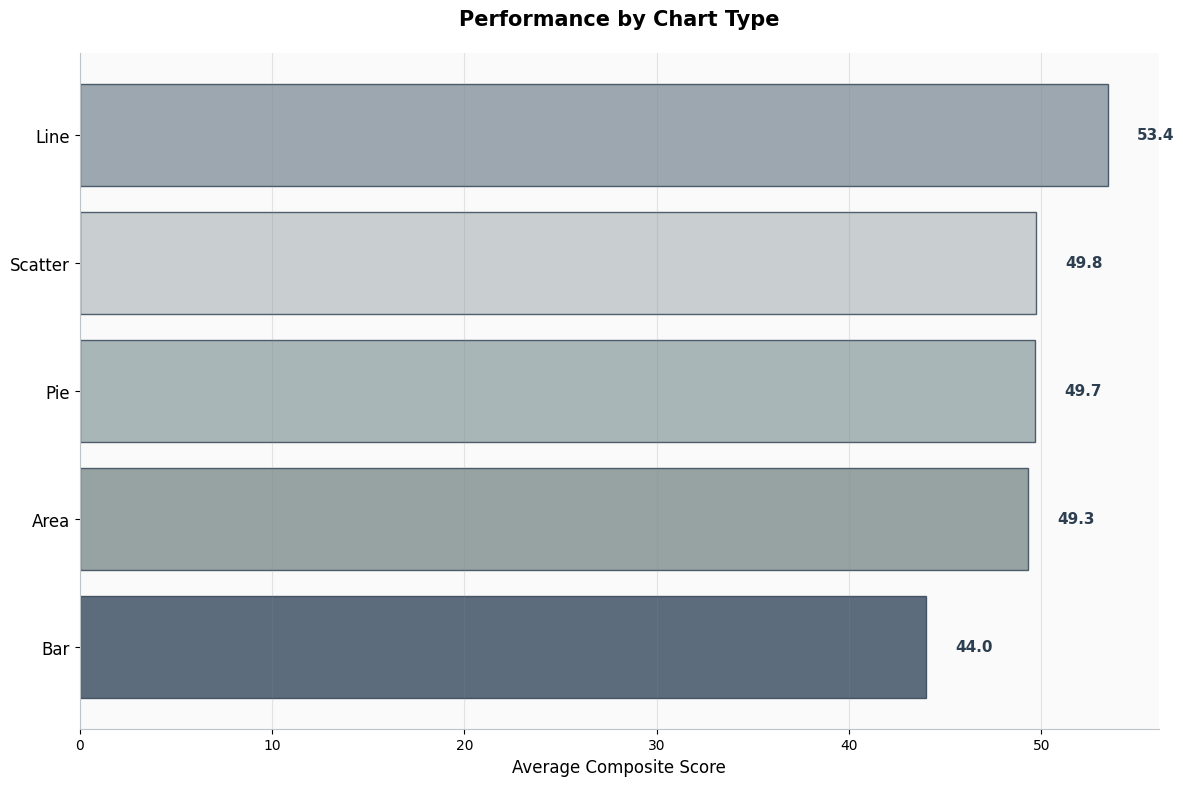

Bar: 44.008 ± 17.906 (n=374)
Area: 49.337 ± 25.140 (n=80)
Pie: 49.682 ± 1.138 (n=129)
Scatter: 49.752 ± 12.428 (n=160)
Line: 53.447 ± 23.216 (n=253)

📊 CHART 2: Chart Type Distribution
----------------------------------------


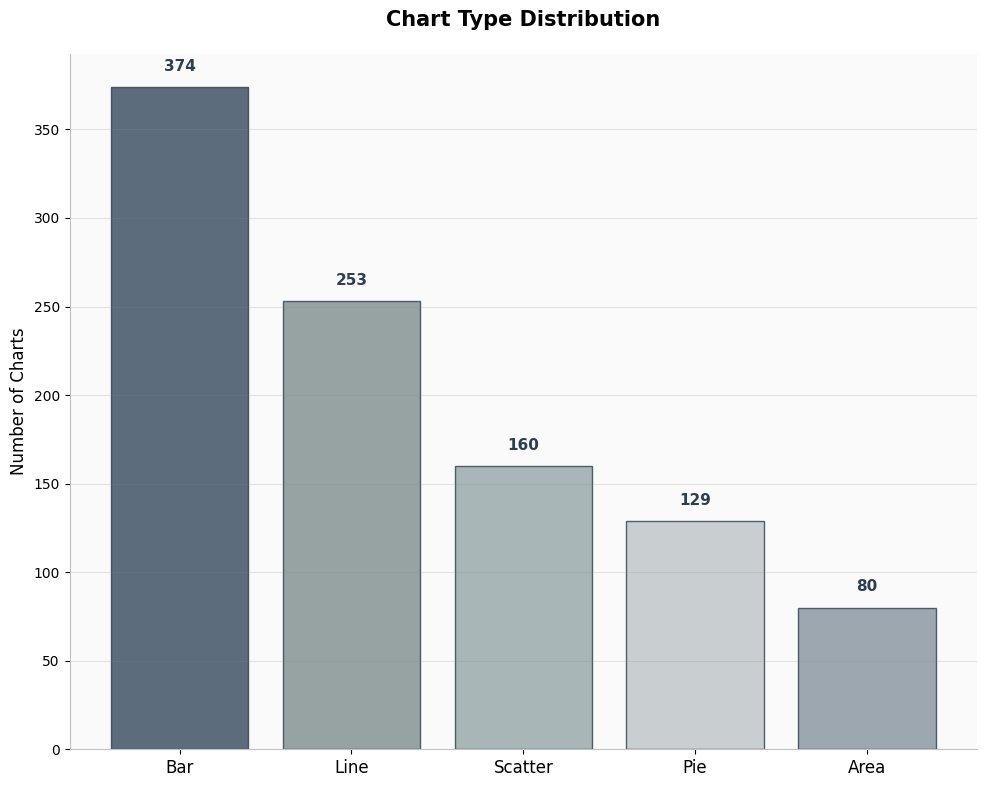


📊 CHART 3: Score Distribution by Chart Type
----------------------------------------


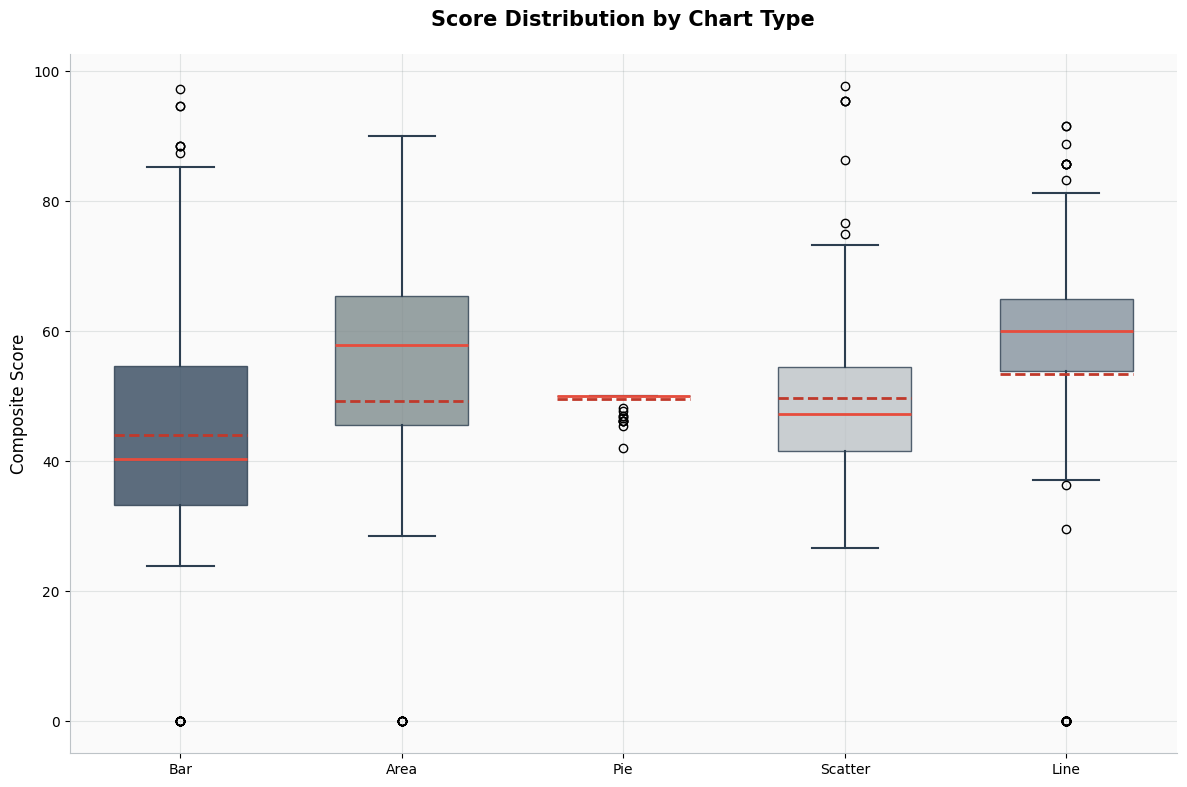

In [33]:
# Chart Type Performance Analysis - Subtle Academic Style
print("CHART TYPE PERFORMANCE ANALYSIS")
print("=" * 50)

# Academic color palette - subtle and professional
academic_colors = ['#2C3E50', '#34495E', '#7F8C8D', '#95A5A6', '#BDC3C7', '#E8E8E8', '#3498DB', '#2980B9']
chart_colors = ['#34495E', '#7F8C8D', '#95A5A6', '#BDC3C7', '#85929E', '#5D6D7E']

# Extract chart types from chart_id or extraction_key
success_df['chart_type'] = success_df['chart_id'].str.extract(r'_(bar|pie|line|scatter|area|heatmap|bubble|donut)_')[0]

# If that doesn't work, try from extraction_key
if success_df['chart_type'].isna().all():
    success_df['chart_type'] = success_df['extraction_key'].str.extract(r'_(bar|pie|line|scatter|area|heatmap|bubble|donut)_')[0]

# Check what chart types we found
chart_type_counts = success_df['chart_type'].value_counts()
print("Chart types found:")
print(chart_type_counts)

if not success_df['chart_type'].isna().all():
    
    # Chart 1: Performance by Chart Type (Clean bars without overlapping text)
    print("\n📊 CHART 1: Performance by Chart Type")
    print("-" * 40)
    
    chart_performance = success_df.groupby('chart_type')['composite_score'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=True)
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    bars = ax.barh(range(len(chart_performance)), chart_performance['mean'].values,
                   color=chart_colors[:len(chart_performance)], alpha=0.8,
                   edgecolor='#2C3E50', linewidth=1)
    
    ax.set_yticks(range(len(chart_performance)))
    ax.set_yticklabels(chart_performance.index.str.title(), fontsize=12, fontweight='500')
    ax.set_xlabel('Average Composite Score', fontsize=12, fontweight='500')
    ax.set_title('Performance by Chart Type', fontsize=15, fontweight='600', pad=20)
    ax.grid(True, alpha=0.2, axis='x', color='#7F8C8D')
    ax.set_facecolor('#FAFAFA')
    
    # Add clean value labels (no overlap)
    for i, (mean_val, std_val, count) in enumerate(zip(chart_performance['mean'].values, 
                                                      chart_performance['std'].values,
                                                      chart_performance['count'].values)):
        ax.text(mean_val + 1.5, i, f'{mean_val:.1f}', va='center', ha='left',
                fontsize=11, fontweight='600', color='#2C3E50')
    
    # Remove top and right spines for cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#BDC3C7')
    ax.spines['bottom'].set_color('#BDC3C7')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    for chart_type in chart_performance.index:
        mean_val = chart_performance.loc[chart_type, 'mean']
        std_val = chart_performance.loc[chart_type, 'std']
        count_val = chart_performance.loc[chart_type, 'count']
        print(f"{chart_type.title()}: {mean_val:.3f} ± {std_val:.3f} (n={count_val})")
    
    # Chart 2: Chart Type Distribution
    print("\n📊 CHART 2: Chart Type Distribution")
    print("-" * 40)
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    bars = ax.bar(range(len(chart_type_counts)), chart_type_counts.values,
                  color=chart_colors[:len(chart_type_counts)], alpha=0.8,
                  edgecolor='#2C3E50', linewidth=1)
    
    ax.set_xticks(range(len(chart_type_counts)))
    ax.set_xticklabels(chart_type_counts.index.str.title(), fontsize=12, fontweight='500')
    ax.set_ylabel('Number of Charts', fontsize=12, fontweight='500')
    ax.set_title('Chart Type Distribution', fontsize=15, fontweight='600', pad=20)
    ax.grid(True, alpha=0.2, axis='y', color='#7F8C8D')
    ax.set_facecolor('#FAFAFA')
    
    # Add value labels on top of bars (clean spacing)
    for i, v in enumerate(chart_type_counts.values):
        ax.text(i, v + max(chart_type_counts.values)*0.02, str(v),
                ha='center', va='bottom', fontsize=11, fontweight='600', color='#2C3E50')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#BDC3C7')
    ax.spines['bottom'].set_color('#BDC3C7')
    
    plt.tight_layout()
    plt.show()
    
    # Chart 3: Score Distribution by Chart Type (Box Plot)
    print("\n📊 CHART 3: Score Distribution by Chart Type")
    print("-" * 40)
    
    chart_types = list(chart_performance.index)
    plot_data = [success_df[success_df['chart_type'] == ct]['composite_score'].values for ct in chart_types]
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    bp = ax.boxplot(plot_data, labels=[ct.title() for ct in chart_types], 
                    patch_artist=True, widths=0.6, showmeans=True, meanline=True,
                    boxprops=dict(alpha=0.8, linewidth=1),
                    whiskerprops=dict(color='#2C3E50', linewidth=1.5),
                    capprops=dict(color='#2C3E50', linewidth=1.5),
                    medianprops=dict(color='#E74C3C', linewidth=2),
                    meanprops=dict(color='#C0392B', linewidth=2))
    
    # Color the boxes with subtle colors
    for i, patch in enumerate(bp['boxes']):
        patch.set_facecolor(chart_colors[i])
        patch.set_edgecolor('#2C3E50')
    
    ax.set_ylabel('Composite Score', fontsize=12, fontweight='500')
    ax.set_title('Score Distribution by Chart Type', fontsize=15, fontweight='600', pad=20)
    ax.grid(True, alpha=0.2, color='#7F8C8D')
    ax.set_facecolor('#FAFAFA')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#BDC3C7')
    ax.spines['bottom'].set_color('#BDC3C7')
    
    plt.tight_layout()
    plt.show()
    
    # # Chart 4: Original vs Perturbed by Chart Type
    # print("\n CHART 4: Original vs Perturbed by Chart Type")
    # print("-" * 40)
    
    # fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # Calculate means for each chart type and condition
    comparison_data = []
    chart_types_available = []
    
    for chart_type in chart_types:
        orig_scores = success_df[(success_df['chart_type'] == chart_type) & 
                                (success_df['is_orig_bool'] == True)]['composite_score']
        pert_scores = success_df[(success_df['chart_type'] == chart_type) & 
                                (success_df['is_orig_bool'] == False)]['composite_score']
        
        if len(orig_scores) > 0 and len(pert_scores) > 0:
            comparison_data.append([orig_scores.mean(), pert_scores.mean()])
            chart_types_available.append(chart_type)
    
    if comparison_data:
        comparison_array = np.array(comparison_data)
        x_pos = np.arange(len(chart_types_available))
        width = 0.35
        
        bars1 = ax.bar(x_pos - width/2, comparison_array[:, 1], width, 
                      label='Perturbed', color='#7F8C8D', alpha=0.8, 
                      edgecolor='#2C3E50', linewidth=1)
        bars2 = ax.bar(x_pos + width/2, comparison_array[:, 0], width,
                      label='Original', color='#34495E', alpha=0.8,
                      edgecolor='#2C3E50', linewidth=1)
        
        ax.set_xlabel('Chart Type', fontsize=12, fontweight='500')
        ax.set_ylabel('Average Composite Score', fontsize=12, fontweight='500')
        ax.set_title('Original vs Perturbed Performance by Chart Type', fontsize=15, fontweight='600', pad=20)
        ax.set_xticks(x_pos)
        ax.set_xticklabels([ct.title() for ct in chart_types_available], fontsize=11, fontweight='500')
        ax.legend(fontsize=11, frameon=False)
        ax.grid(True, alpha=0.2, axis='y', color='#7F8C8D')
        ax.set_facecolor('#FAFAFA')
        
        # Add clean value labels
        for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
            height1 = bar1.get_height()
            height2 = bar2.get_height()
            ax.text(bar1.get_x() + bar1.get_width()/2., height1 + 0.5,
                   f'{height1:.1f}', ha='center', va='bottom', 
                   fontsize=10, fontweight='600', color='#2C3E50')
            ax.text(bar2.get_x() + bar2.get_width()/2., height2 + 0.5,
                   f'{height2:.1f}', ha='center', va='bottom',
                   fontsize=10, fontweight='600', color='#2C3E50')
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_color('#BDC3C7')
        ax.spines['bottom'].set_color('#BDC3C7')
        
        # plt.tight_layout()
        # plt.show()
        
        # Print comparison statistics
        print("\nPerformance Comparison:")
        for i, chart_type in enumerate(chart_types_available):
            orig_score = comparison_array[i, 0]
            pert_score = comparison_array[i, 1]
            diff = orig_score - pert_score
            print(f"{chart_type.title()}: Original={orig_score:.3f}, Perturbed={pert_score:.3f}, Diff={diff:+.3f}")

else:
    print("Could not extract chart types. Showing sample data patterns:")
    print(success_df['extraction_key'].head(10).tolist())

### Cell 14: Chart Complexity Analysis (Subtle & Individual)

CHART COMPLEXITY ANALYSIS
Complexity levels found:
complexity
complex     550
medium      509
advanced    333
Name: count, dtype: int64

📊 CHART 1: Performance by Complexity Level
---------------------------------------------


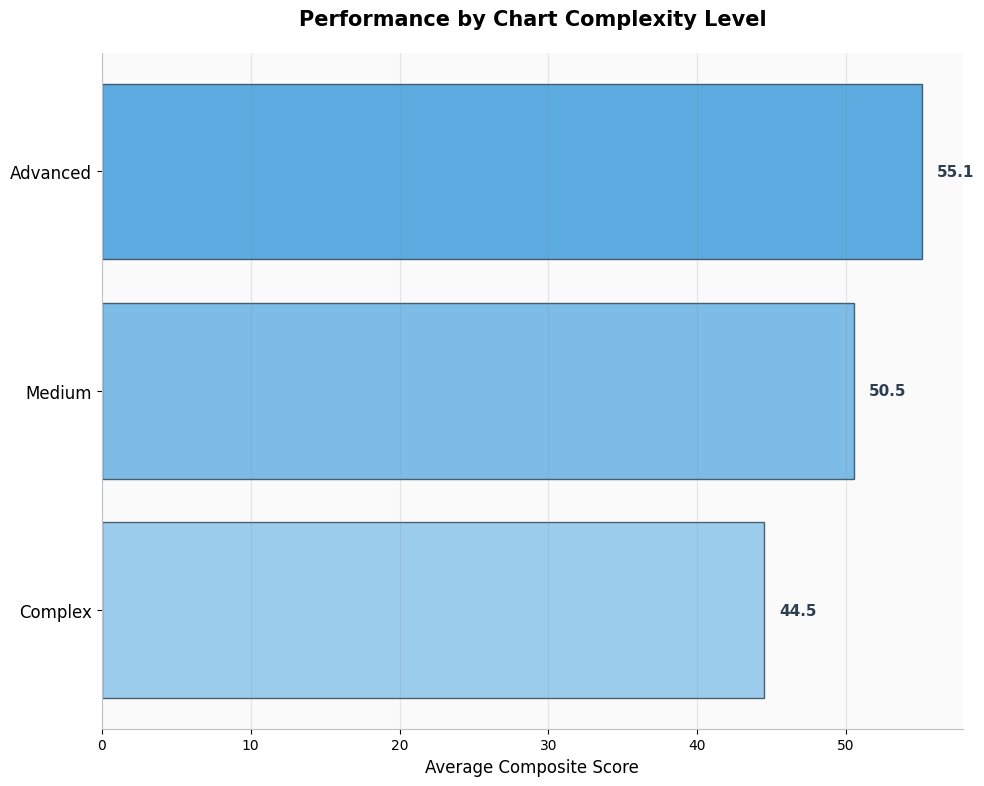


📊 CHART 2: Complexity Level Distribution
----------------------------------------


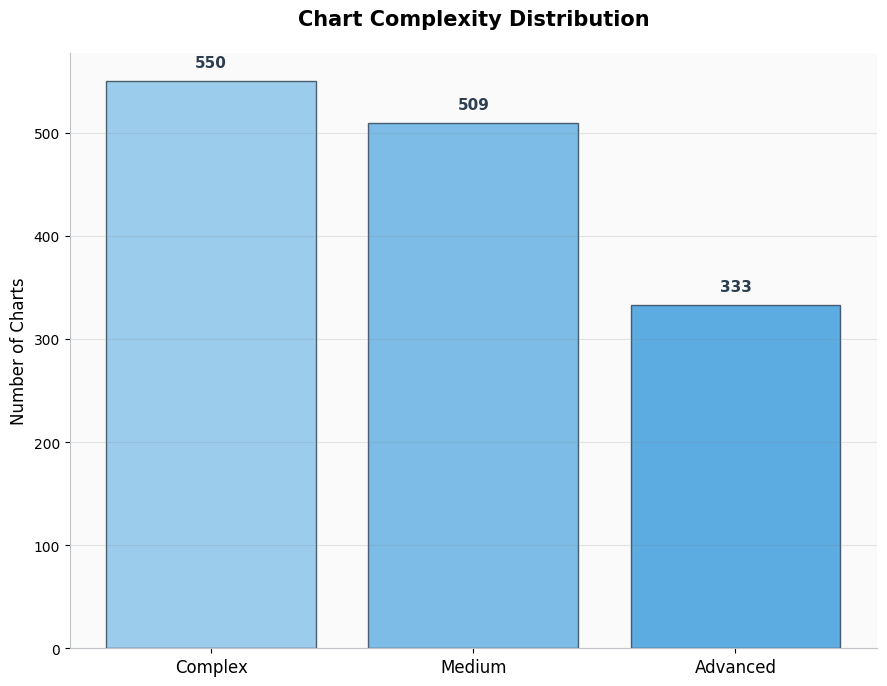


📊 CHART 3: Original vs Perturbed by Complexity
---------------------------------------------


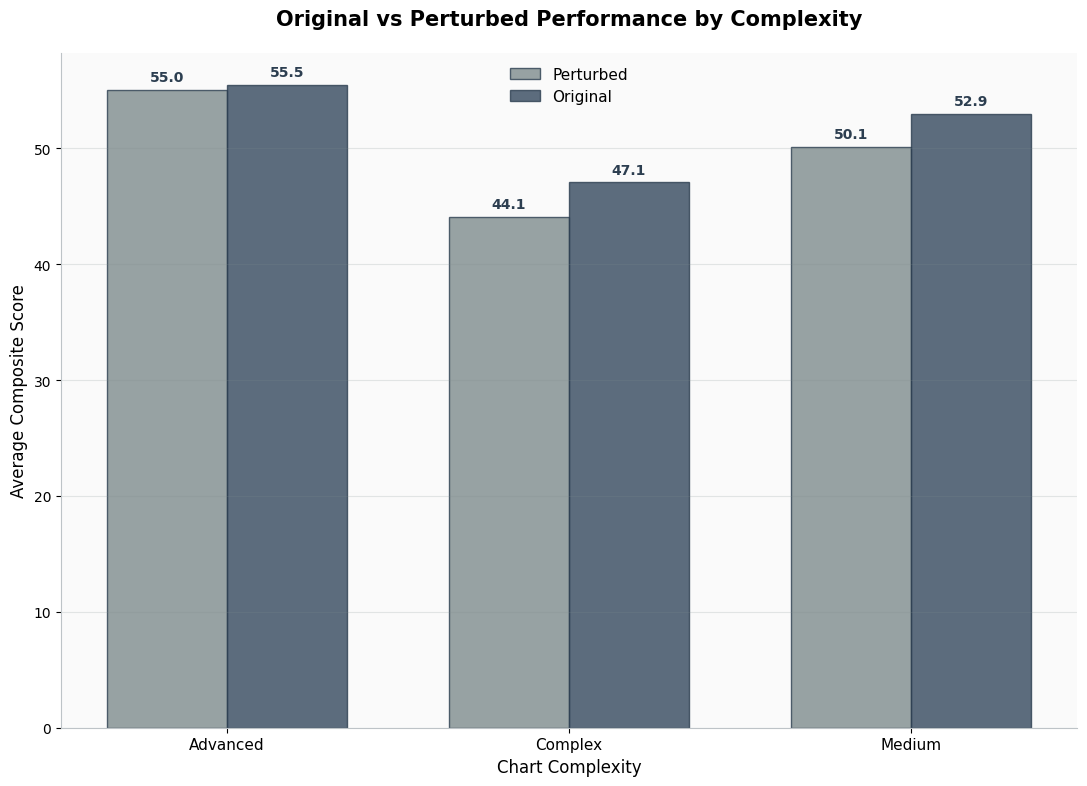


📊 CHART 4: All Performance Metrics by Complexity
--------------------------------------------------


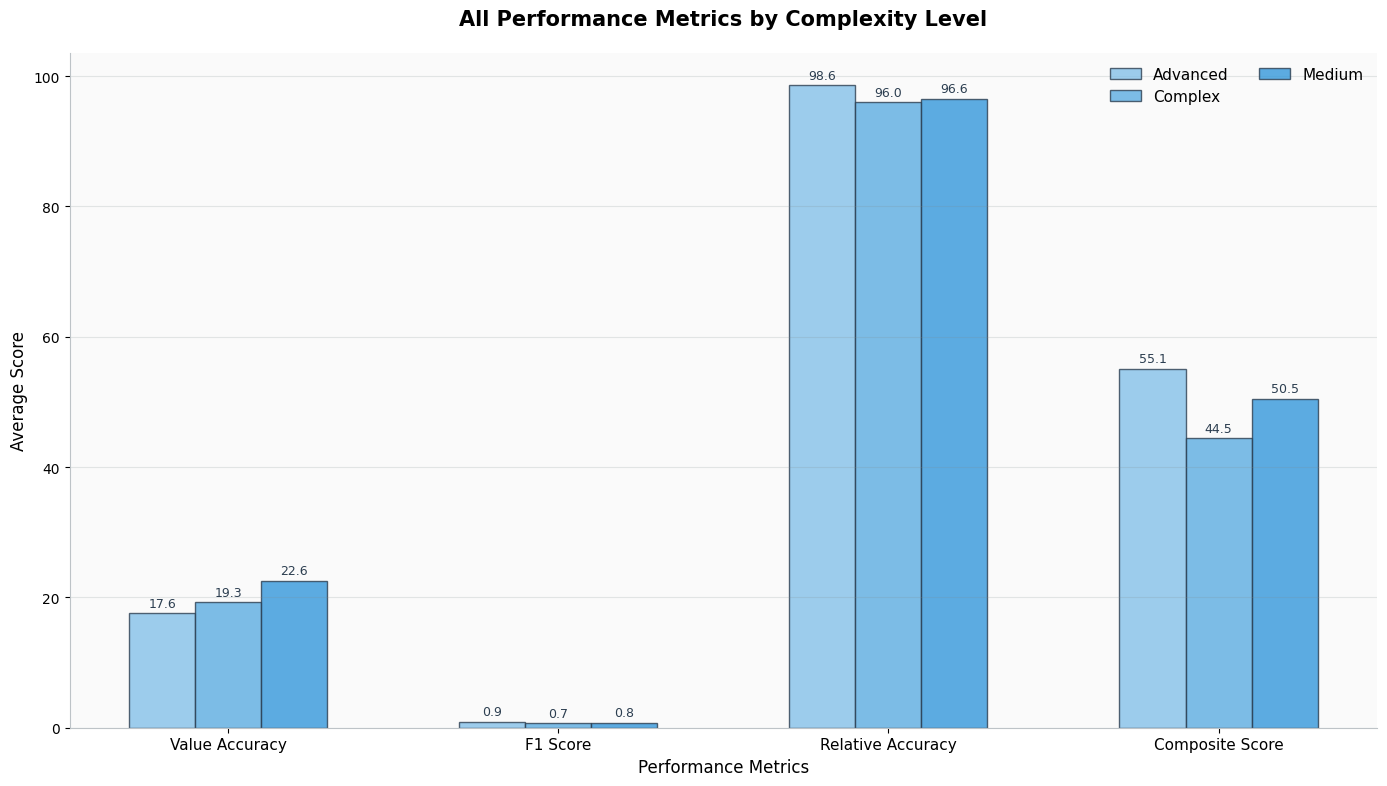


DETAILED COMPLEXITY STATISTICS:

COMPLEX CHARTS: (550 total)
  Original: 78 charts, avg score: 47.055
  Perturbed: 472 charts, avg score: 44.066
  Performance gap: +2.988

MEDIUM CHARTS: (509 total)
  Original: 73 charts, avg score: 52.929
  Perturbed: 436 charts, avg score: 50.109
  Performance gap: +2.820

ADVANCED CHARTS: (333 total)
  Original: 47 charts, avg score: 55.459
  Perturbed: 286 charts, avg score: 55.042
  Performance gap: +0.418


In [34]:
# Chart Complexity Analysis - Subtle Academic Style  
print("CHART COMPLEXITY ANALYSIS")
print("=" * 50)

# Extract complexity from chart_id or extraction_key
if 'chart_complexity' not in success_df.columns or success_df['chart_complexity'].isna().all():
    success_df['complexity'] = success_df['chart_id'].str.extract(r'_(simple|medium|complex|advanced)_')[0]
    
    if success_df['complexity'].isna().all():
        success_df['complexity'] = success_df['extraction_key'].str.extract(r'_(simple|medium|complex|advanced)_')[0]
else:
    success_df['complexity'] = success_df['chart_complexity']

complexity_counts = success_df['complexity'].value_counts()
print("Complexity levels found:")
print(complexity_counts)

if not success_df['complexity'].isna().all():
    
    # Subtle complexity colors (light to dark)
    complexity_colors = ['#85C1E9', '#5DADE2', '#3498DB', '#2E86C1']  # Light blue gradient
    
    # Chart 1: Performance by Complexity
    print("\n📊 CHART 1: Performance by Complexity Level")
    print("-" * 45)
    
    complexity_performance = success_df.groupby('complexity')['composite_score'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=True)
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    bars = ax.barh(range(len(complexity_performance)), complexity_performance['mean'].values,
                   color=complexity_colors[:len(complexity_performance)], alpha=0.8,
                   edgecolor='#2C3E50', linewidth=1)
    
    ax.set_yticks(range(len(complexity_performance)))
    ax.set_yticklabels(complexity_performance.index.str.title(), fontsize=12, fontweight='500')
    ax.set_xlabel('Average Composite Score', fontsize=12, fontweight='500')
    ax.set_title('Performance by Chart Complexity Level', fontsize=15, fontweight='600', pad=20)
    ax.grid(True, alpha=0.2, axis='x', color='#7F8C8D')
    ax.set_facecolor('#FAFAFA')
    
    # Add clean value labels
    for i, (mean_val, std_val) in enumerate(zip(complexity_performance['mean'].values, 
                                               complexity_performance['std'].values)):
        ax.text(mean_val + 1, i, f'{mean_val:.1f}', va='center', ha='left',
                fontsize=11, fontweight='600', color='#2C3E50')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#BDC3C7')
    ax.spines['bottom'].set_color('#BDC3C7')
    
    plt.tight_layout()
    plt.show()
    
    # Chart 2: Complexity Distribution
    print("\n📊 CHART 2: Complexity Level Distribution")
    print("-" * 40)
    
    fig, ax = plt.subplots(1, 1, figsize=(9, 7))
    
    bars = ax.bar(range(len(complexity_counts)), complexity_counts.values,
                  color=complexity_colors[:len(complexity_counts)], alpha=0.8,
                  edgecolor='#2C3E50', linewidth=1)
    
    ax.set_xticks(range(len(complexity_counts)))
    ax.set_xticklabels(complexity_counts.index.str.title(), fontsize=12, fontweight='500')
    ax.set_ylabel('Number of Charts', fontsize=12, fontweight='500')
    ax.set_title('Chart Complexity Distribution', fontsize=15, fontweight='600', pad=20)
    ax.grid(True, alpha=0.2, axis='y', color='#7F8C8D')
    ax.set_facecolor('#FAFAFA')
    
    # Add value labels
    for i, v in enumerate(complexity_counts.values):
        ax.text(i, v + max(complexity_counts.values)*0.02, str(v),
                ha='center', va='bottom', fontsize=11, fontweight='600', color='#2C3E50')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#BDC3C7')
    ax.spines['bottom'].set_color('#BDC3C7')
    
    plt.tight_layout()
    plt.show()
    
    # Chart 3: Original vs Perturbed by Complexity
    print("\n📊 CHART 3: Original vs Perturbed by Complexity")
    print("-" * 45)
    
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    
    # Calculate comparison data
    complexity_comparison = success_df.groupby(['complexity', 'is_orig_bool'])['composite_score'].mean().unstack()
    
    if complexity_comparison.shape[1] == 2:  # Both original and perturbed exist
        x_pos = np.arange(len(complexity_comparison.index))
        width = 0.35
        
        bars1 = ax.bar(x_pos - width/2, complexity_comparison.iloc[:, 0].values, width,
                      label='Perturbed', color='#7F8C8D', alpha=0.8,
                      edgecolor='#2C3E50', linewidth=1)
        bars2 = ax.bar(x_pos + width/2, complexity_comparison.iloc[:, 1].values, width,
                      label='Original', color='#34495E', alpha=0.8,
                      edgecolor='#2C3E50', linewidth=1)
        
        ax.set_xlabel('Chart Complexity', fontsize=12, fontweight='500')
        ax.set_ylabel('Average Composite Score', fontsize=12, fontweight='500')
        ax.set_title('Original vs Perturbed Performance by Complexity', fontsize=15, fontweight='600', pad=20)
        ax.set_xticks(x_pos)
        ax.set_xticklabels(complexity_comparison.index.str.title(), fontsize=11, fontweight='500')
        ax.legend(fontsize=11, frameon=False)
        ax.grid(True, alpha=0.2, axis='y', color='#7F8C8D')
        ax.set_facecolor('#FAFAFA')
        
        # Add value labels
        for bar in bars1:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'{height:.1f}', ha='center', va='bottom',
                   fontsize=10, fontweight='600', color='#2C3E50')
        
        for bar in bars2:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'{height:.1f}', ha='center', va='bottom',
                   fontsize=10, fontweight='600', color='#2C3E50')
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_color('#BDC3C7')
        ax.spines['bottom'].set_color('#BDC3C7')
        
        plt.tight_layout()
        plt.show()
    
    # Chart 4: All Metrics by Complexity (Individual bars for clarity)
    print("\n📊 CHART 4: All Performance Metrics by Complexity")
    print("-" * 50)
    
    metrics_by_complexity = success_df.groupby('complexity')[metrics].mean()
    
    fig, ax = plt.subplots(1, 1, figsize=(14, 8))
    
    x_pos = np.arange(len(metrics))
    width = 0.2
    
    for i, complexity in enumerate(metrics_by_complexity.index):
        offset = (i - len(metrics_by_complexity.index)/2 + 0.5) * width
        bars = ax.bar(x_pos + offset, metrics_by_complexity.loc[complexity].values,
                     width, label=complexity.title(), alpha=0.8,
                     color=complexity_colors[i], edgecolor='#2C3E50', linewidth=1)
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'{height:.1f}', ha='center', va='bottom',
                   fontsize=9, fontweight='500', color='#2C3E50', rotation=0)
    
    ax.set_xlabel('Performance Metrics', fontsize=12, fontweight='500')
    ax.set_ylabel('Average Score', fontsize=12, fontweight='500')
    ax.set_title('All Performance Metrics by Complexity Level', fontsize=15, fontweight='600', pad=20)
    ax.set_xticks(x_pos)
    ax.set_xticklabels([m.replace('_', ' ').title() for m in metrics], fontsize=11, fontweight='500')
    ax.legend(fontsize=11, frameon=False, ncol=2)
    ax.grid(True, alpha=0.2, axis='y', color='#7F8C8D')
    ax.set_facecolor('#FAFAFA')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#BDC3C7')
    ax.spines['bottom'].set_color('#BDC3C7')
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print(f"\nDETAILED COMPLEXITY STATISTICS:")
    print("=" * 60)
    for complexity in complexity_performance.index:
        subset = success_df[success_df['complexity'] == complexity]
        orig_subset = subset[subset['is_orig_bool'] == True]
        pert_subset = subset[subset['is_orig_bool'] == False]
        
        print(f"\n{complexity.upper()} CHARTS: ({len(subset)} total)")
        if len(orig_subset) > 0:
            print(f"  Original: {len(orig_subset)} charts, avg score: {orig_subset['composite_score'].mean():.3f}")
        if len(pert_subset) > 0:
            print(f"  Perturbed: {len(pert_subset)} charts, avg score: {pert_subset['composite_score'].mean():.3f}")
        
        if len(orig_subset) > 0 and len(pert_subset) > 0:
            diff = orig_subset['composite_score'].mean() - pert_subset['composite_score'].mean()
            print(f"  Performance gap: {diff:+.3f}")

else:
    print("Could not extract complexity information from the data.")

### 15: Chart Type vs Perturbation Analysis

CHART TYPE VS PERTURBATION ANALYSIS

📊 CHART 1: Performance Heatmap - Chart Type vs Perturbation Type
-----------------------------------------------------------------


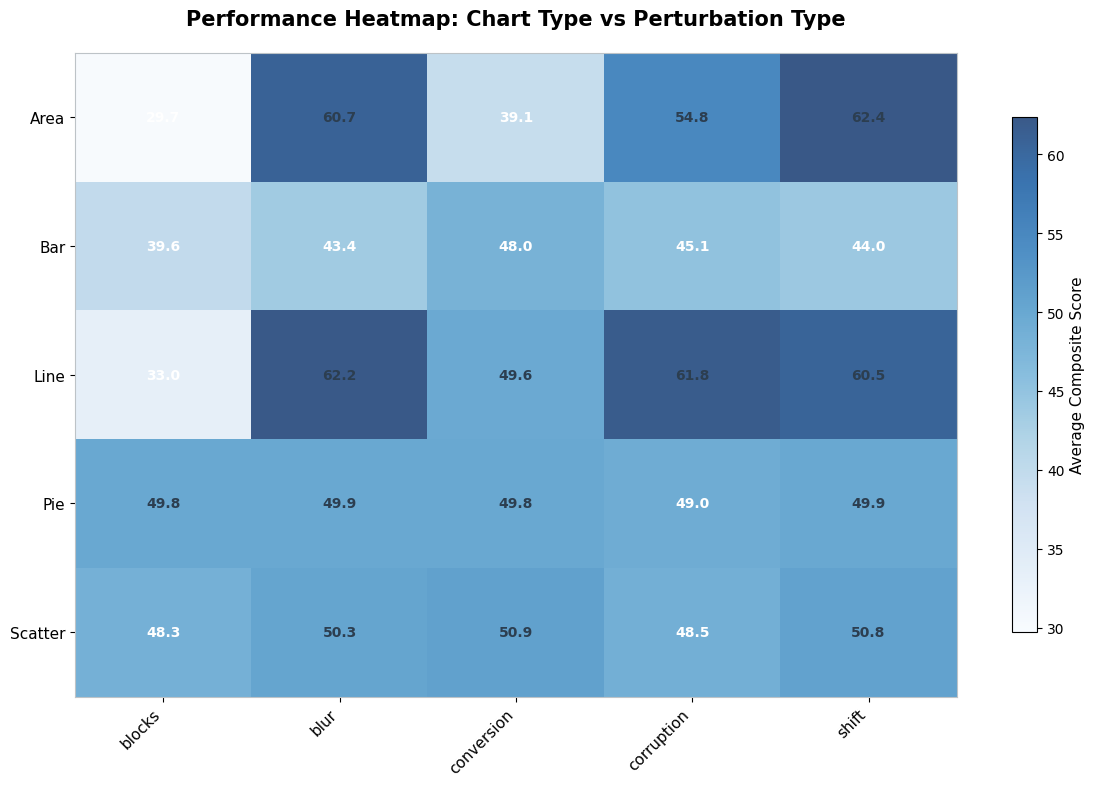

Heatmap Values:
perturbation_type  blocks   blur  conversion  corruption  shift
chart_type                                                     
area                29.71  60.71       39.11       54.80  62.36
bar                 39.61  43.40       48.01       45.08  43.95
line                33.03  62.20       49.57       61.81  60.47
pie                 49.82  49.85       49.85       49.05  49.85
scatter             48.25  50.27       50.93       48.47  50.85

📊 CHART 2: Chart Type Vulnerability to Perturbations
-------------------------------------------------------

📊 CHART 3: Best/Worst Chart-Perturbation Combinations
-------------------------------------------------------


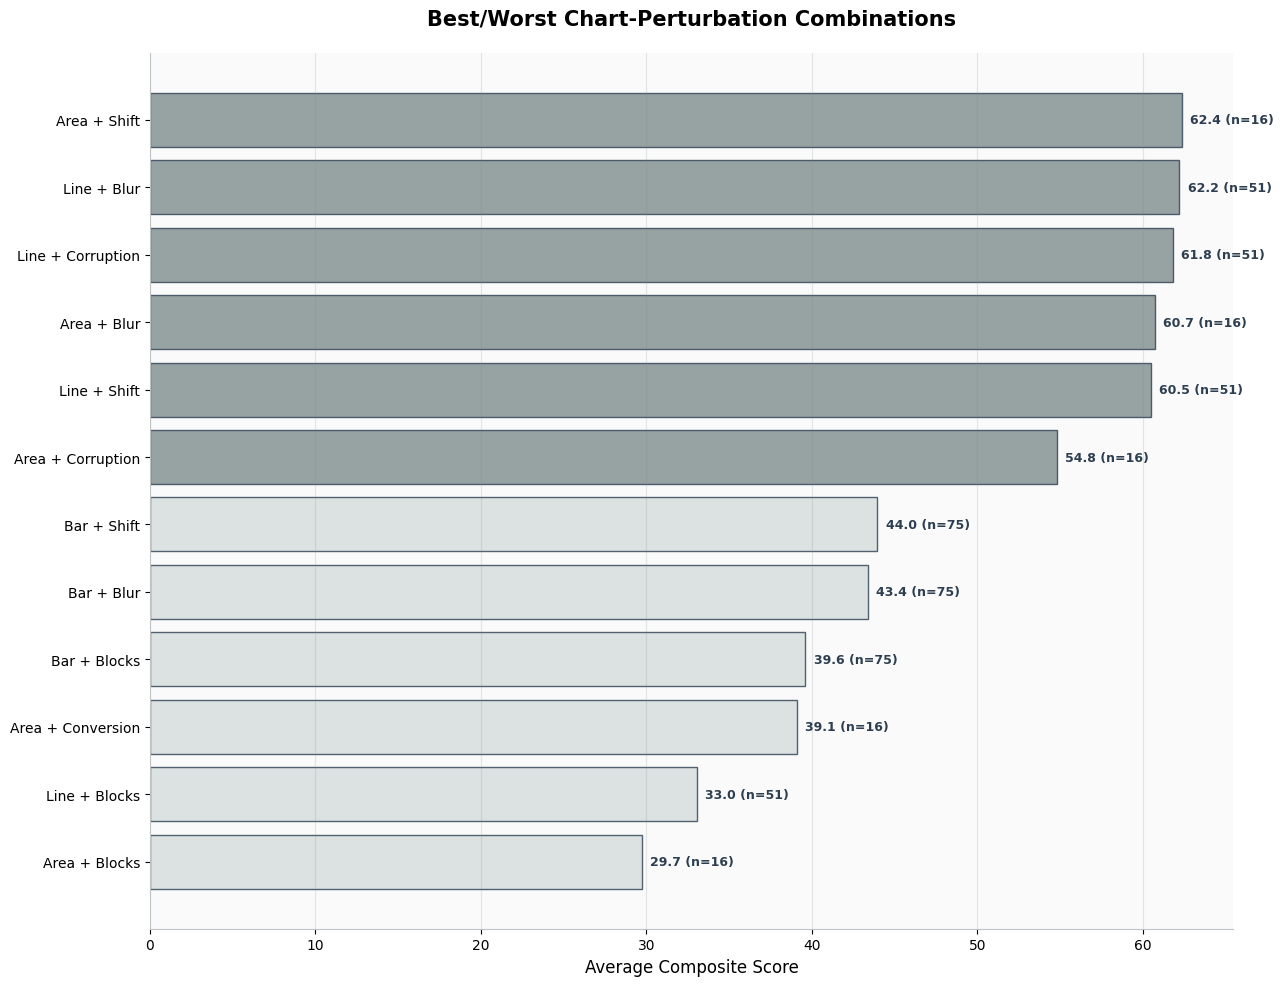

Performance Rankings:
WORST: Area + Blocks - Score: 29.710 (n=16)
WORST: Line + Blocks - Score: 33.030 (n=51)
WORST: Area + Conversion - Score: 39.111 (n=16)
WORST: Bar + Blocks - Score: 39.612 (n=75)
WORST: Bar + Blur - Score: 43.398 (n=75)
WORST: Bar + Shift - Score: 43.954 (n=75)
BEST: Area + Corruption - Score: 54.800 (n=16)
BEST: Line + Shift - Score: 60.465 (n=51)
BEST: Area + Blur - Score: 60.708 (n=16)
BEST: Line + Corruption - Score: 61.814 (n=51)
BEST: Line + Blur - Score: 62.205 (n=51)
BEST: Area + Shift - Score: 62.356 (n=16)

📊 CHART 4: Perturbation Effects Across Chart Types
--------------------------------------------------


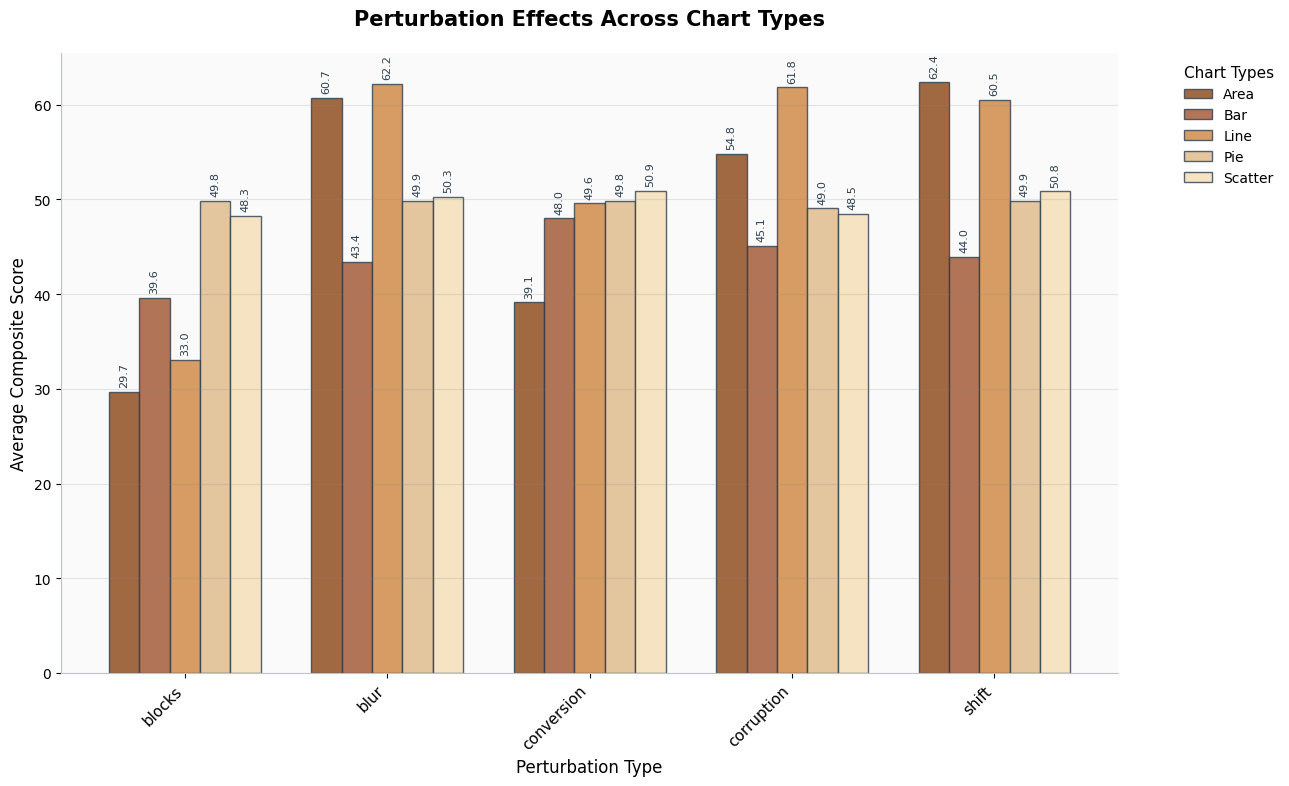

Perturbation Effects Summary:
chart_type           area     bar    line     pie  scatter
perturbation_type                                         
blocks             29.710  39.612  33.030  49.816   48.253
blur               60.708  43.398  62.205  49.852   50.269
conversion         39.111  48.006  49.570  49.846   50.926
corruption         54.800  45.083  61.814  49.049   48.467
shift              62.356  43.954  60.465  49.852   50.846

📊 CHART 5: Sample Size Matrix - Chart Type vs Perturbation Type
------------------------------------------------------------


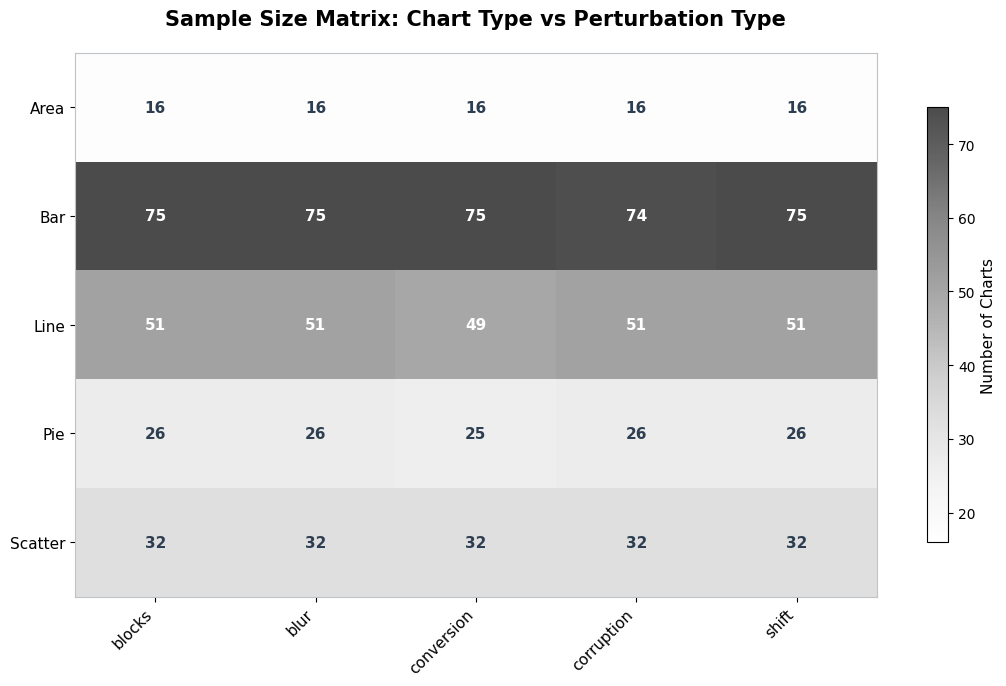

Sample Size Matrix:
perturbation_type  blocks  blur  conversion  corruption  shift
chart_type                                                    
area                   16    16          16          16     16
bar                    75    75          75          74     75
line                   51    51          49          51     51
pie                    26    26          25          26     26
scatter                32    32          32          32     32

📋 SUMMARY INSIGHTS:
• Worst performing combination:
  Area + Blocks (score: 29.710)
• Best performing combination:
  Area + Shift (score: 62.356)
• Most challenging perturbation: blocks (avg: 40.084)
• Least challenging perturbation: shift (avg: 53.494)


In [39]:
# Chart Type vs Perturbation Analysis - Subtle Academic Style
print("CHART TYPE VS PERTURBATION ANALYSIS")
print("=" * 50)

# Subtle academic color palette
subtle_colors = ['#8B4513', '#A0522D', '#CD853F', '#DEB887', '#F5DEB3', '#FFF8DC']
heatmap_colors = 'YlOrBr' 

# Only analyze if we have both chart types and perturbations
if not success_df['chart_type'].isna().all():
    perturbed_charts = success_df[success_df['is_orig_bool'] == False].copy()
    
    if len(perturbed_charts) > 0:
        
        # Chart 1: Performance Heatmap - Chart Type vs Perturbation Type
        print("\n📊 CHART 1: Performance Heatmap - Chart Type vs Perturbation Type")
        print("-" * 65)
        
        cross_performance = perturbed_charts.groupby(['chart_type', 'perturbation_type'])['composite_score'].mean().unstack(fill_value=0)
        
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))
        
        # Create heatmap with subtle colors
        im = ax.imshow(cross_performance.values, cmap='Blues', aspect='auto', alpha=0.8)
        
        ax.set_xticks(range(len(cross_performance.columns)))
        ax.set_yticks(range(len(cross_performance.index)))
        ax.set_xticklabels(cross_performance.columns, rotation=45, ha='right', fontsize=11, fontweight='500')
        ax.set_yticklabels([ct.title() for ct in cross_performance.index], fontsize=11, fontweight='500')
        ax.set_title('Performance Heatmap: Chart Type vs Perturbation Type', fontsize=15, fontweight='600', pad=20)
        
        # Add subtle colorbar
        cbar = plt.colorbar(im, ax=ax, shrink=0.8)
        cbar.set_label('Average Composite Score', fontsize=11, fontweight='500')
        cbar.ax.tick_params(labelsize=10)
        
        # Add values to heatmap with good contrast
        for i in range(len(cross_performance.index)):
            for j in range(len(cross_performance.columns)):
                value = cross_performance.iloc[i, j]
                if value > 0:
                    text_color = 'white' if value < cross_performance.values.mean() else '#2C3E50'
                    ax.text(j, i, f'{value:.1f}', ha="center", va="center", 
                           color=text_color, fontweight='600', fontsize=10)
        
        # Clean styling
        ax.set_facecolor('#FAFAFA')
        for spine in ax.spines.values():
            spine.set_color('#BDC3C7')
        
        plt.tight_layout()
        plt.show()
        
        # Print heatmap data
        print("Heatmap Values:")
        print(cross_performance.round(2))
        
        # Chart 2: Chart Type Vulnerability Analysis
        print("\n📊 CHART 2: Chart Type Vulnerability to Perturbations")
        print("-" * 55)
        
        chart_vulnerability = []
        for chart_type in success_df['chart_type'].dropna().unique():
            orig_score = success_df[(success_df['chart_type'] == chart_type) & 
                                  (success_df['is_orig_bool'] == True)]['composite_score'].mean()
            pert_score = success_df[(success_df['chart_type'] == chart_type) & 
                                  (success_df['is_orig_bool'] == False)]['composite_score'].mean()
            
            if not np.isnan(orig_score) and not np.isnan(pert_score):
                vulnerability = orig_score - pert_score
                chart_vulnerability.append((chart_type, vulnerability, orig_score, pert_score))
        
        if chart_vulnerability:
            chart_vulnerability.sort(key=lambda x: x[1], reverse=True)
            
            fig, ax = plt.subplots(1, 1, figsize=(11, 8))
            
            chart_names = [cv[0].title() for cv in chart_vulnerability]
            vulnerabilities = [cv[1] for cv in chart_vulnerability]
            
            # Use subtle colors based on positive/negative values
            bar_colors = ['#A0522D' if v > 0 else '#7F8C8D' for v in vulnerabilities]
            
            bars = ax.bar(range(len(chart_vulnerability)), vulnerabilities,
                         color=bar_colors, alpha=0.8, edgecolor='#2C3E50', linewidth=1)
            
            ax.set_xticks(range(len(chart_vulnerability)))
            ax.set_xticklabels(chart_names, rotation=45, ha='right', fontsize=11, fontweight='500')
            ax.set_ylabel('Performance Drop (Original - Perturbed)', fontsize=12, fontweight='500')
            ax.set_title('Chart Type Vulnerability to Perturbations', fontsize=15, fontweight='600', pad=20)
            ax.axhline(y=0, color='#2C3E50', linestyle='-', alpha=0.7, linewidth=1)
            ax.grid(True, alpha=0.2, axis='y', color='#7F8C8D')
            ax.set_facecolor('#FAFAFA')
            
            # Add clean value labels
            for i, (bar, vuln) in enumerate(zip(bars, vulnerabilities)):
                height = bar.get_height()
                label_y = height + (0.2 if height >= 0 else -0.3)
                ax.text(bar.get_x() + bar.get_width()/2., label_y,
                       f'{vuln:.2f}', ha='center', 
                       va='bottom' if height >= 0 else 'top',
                       fontweight='600', fontsize=10, color='#2C3E50')
            
            # Clean styling
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_color('#BDC3C7')
            ax.spines['bottom'].set_color('#BDC3C7')
            
            plt.tight_layout()
            plt.show()
            
            # Print vulnerability statistics
            print("Vulnerability Analysis:")
            for name, vuln, orig, pert in chart_vulnerability:
                print(f"{name.title()}: {vuln:+.3f} points (Original: {orig:.3f}, Perturbed: {pert:.3f})")
        
        # Chart 3: Best/Worst Chart-Perturbation Combinations
        print("\n📊 CHART 3: Best/Worst Chart-Perturbation Combinations")
        print("-" * 55)
        
        combo_performance = perturbed_charts.groupby(['chart_type', 'perturbation_type'])['composite_score'].agg(['mean', 'count']).reset_index()
        combo_performance = combo_performance[combo_performance['count'] >= 3]  # Filter combinations with enough data
        combo_performance = combo_performance.sort_values('mean', ascending=True)
        
        if len(combo_performance) > 0:
            fig, ax = plt.subplots(1, 1, figsize=(13, 10))
            
            # Take top and bottom combinations
            n_show = min(12, len(combo_performance))
            if len(combo_performance) > n_show:
                worst_n = n_show // 2
                best_n = n_show - worst_n
                selected_combos = pd.concat([
                    combo_performance.head(worst_n),
                    combo_performance.tail(best_n)
                ])
            else:
                selected_combos = combo_performance
            
            selected_combos['combo'] = selected_combos['chart_type'].str.title() + ' + ' + selected_combos['perturbation_type'].str.title()
            
            # Color coding: worse performance = lighter, better = darker
            colors_gradient = []
            for i, score in enumerate(selected_combos['mean'].values):
                if i < len(selected_combos) // 2:
                    colors_gradient.append('#D5DBDB')  # Light gray for worst
                else:
                    colors_gradient.append('#7F8C8D')  # Darker gray for best
            
            bars = ax.barh(range(len(selected_combos)), selected_combos['mean'].values,
                          color=colors_gradient, alpha=0.8, edgecolor='#2C3E50', linewidth=1)
            
            ax.set_yticks(range(len(selected_combos)))
            ax.set_yticklabels(selected_combos['combo'].values, fontsize=10, fontweight='500')
            ax.set_xlabel('Average Composite Score', fontsize=12, fontweight='500')
            ax.set_title('Best/Worst Chart-Perturbation Combinations', fontsize=15, fontweight='600', pad=20)
            ax.grid(True, alpha=0.2, axis='x', color='#7F8C8D')
            ax.set_facecolor('#FAFAFA')
            
            # Add value labels
            for i, (bar, mean_val, count) in enumerate(zip(bars, selected_combos['mean'].values, selected_combos['count'].values)):
                ax.text(mean_val + 0.5, bar.get_y() + bar.get_height()/2, 
                       f'{mean_val:.1f} (n={count})', va='center', ha='left',
                       fontsize=9, fontweight='600', color='#2C3E50')
            
            # Clean styling
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_color('#BDC3C7')
            ax.spines['bottom'].set_color('#BDC3C7')
            
            plt.tight_layout()
            plt.show()
            
            # Print combination statistics
            print("Performance Rankings:")
            for i, row in selected_combos.iterrows():
                rank = "WORST" if row['mean'] in selected_combos['mean'].nsmallest(len(selected_combos)//2).values else "BEST"
                print(f"{rank}: {row['combo']} - Score: {row['mean']:.3f} (n={row['count']})")
        
        # Chart 4: Perturbation Effects Across Chart Types
        print("\n📊 CHART 4: Perturbation Effects Across Chart Types")
        print("-" * 50)
        
        if len(cross_performance) > 0:
            fig, ax = plt.subplots(1, 1, figsize=(13, 8))
            
            # Transpose to have perturbations as x-axis
            perturbation_effect = cross_performance.T
            
            x_pos = np.arange(len(perturbation_effect.index))
            width = 0.15
            
            # Plot each chart type as a separate bar group
            for i, chart_type in enumerate(perturbation_effect.columns):
                offset = (i - len(perturbation_effect.columns)/2 + 0.5) * width
                bars = ax.bar(x_pos + offset, perturbation_effect[chart_type].values,
                             width, label=chart_type.title(), alpha=0.8,
                             color=subtle_colors[i], edgecolor='#2C3E50', linewidth=1)
                
                # Add value labels on bars (rotated for clarity)
                for bar in bars:
                    height = bar.get_height()
                    if height > 0:  # Only label non-zero values
                        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                               f'{height:.1f}', ha='center', va='bottom',
                               fontsize=8, fontweight='500', color='#2C3E50', rotation=90)
            
            ax.set_xlabel('Perturbation Type', fontsize=12, fontweight='500')
            ax.set_ylabel('Average Composite Score', fontsize=12, fontweight='500')
            ax.set_title('Perturbation Effects Across Chart Types', fontsize=15, fontweight='600', pad=20)
            ax.set_xticks(x_pos)
            ax.set_xticklabels(perturbation_effect.index, rotation=45, ha='right', fontsize=11, fontweight='500')
            ax.legend(title='Chart Types', bbox_to_anchor=(1.05, 1), loc='upper left', 
                     fontsize=10, title_fontsize=11, frameon=False)
            ax.grid(True, alpha=0.2, axis='y', color='#7F8C8D')
            ax.set_facecolor('#FAFAFA')
            
            # Clean styling
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_color('#BDC3C7')
            ax.spines['bottom'].set_color('#BDC3C7')
            
            plt.tight_layout()
            plt.show()
            
            # Print perturbation effects summary
            print("Perturbation Effects Summary:")
            print(perturbation_effect.round(3))
        
        # Chart 5: Count Matrix - Chart Type vs Perturbation Type
        print("\n📊 CHART 5: Sample Size Matrix - Chart Type vs Perturbation Type")
        print("-" * 60)
        
        cross_counts = perturbed_charts.groupby(['chart_type', 'perturbation_type']).size().unstack(fill_value=0)
        
        fig, ax = plt.subplots(1, 1, figsize=(11, 7))
        
        # Create count heatmap with subtle colors
        im = ax.imshow(cross_counts.values, cmap='Greys', aspect='auto', alpha=0.7)
        
        ax.set_xticks(range(len(cross_counts.columns)))
        ax.set_yticks(range(len(cross_counts.index)))
        ax.set_xticklabels(cross_counts.columns, rotation=45, ha='right', fontsize=11, fontweight='500')
        ax.set_yticklabels([ct.title() for ct in cross_counts.index], fontsize=11, fontweight='500')
        ax.set_title('Sample Size Matrix: Chart Type vs Perturbation Type', fontsize=15, fontweight='600', pad=20)
        
        # Add colorbar
        cbar = plt.colorbar(im, ax=ax, shrink=0.8)
        cbar.set_label('Number of Charts', fontsize=11, fontweight='500')
        cbar.ax.tick_params(labelsize=10)
        
        # Add count values to heatmap
        for i in range(len(cross_counts.index)):
            for j in range(len(cross_counts.columns)):
                count = cross_counts.iloc[i, j]
                if count > 0:
                    text_color = 'white' if count > cross_counts.values.mean() else '#2C3E50'
                    ax.text(j, i, str(count), ha="center", va="center", 
                           color=text_color, fontweight='600', fontsize=11)
        
        # Clean styling
        ax.set_facecolor('#FAFAFA')
        for spine in ax.spines.values():
            spine.set_color('#BDC3C7')
        
        plt.tight_layout()
        plt.show()
        
        print("Sample Size Matrix:")
        print(cross_counts)
        
        # Summary insights
        print(f"\n📋 SUMMARY INSIGHTS:")
        print("=" * 40)
        
        if chart_vulnerability:
            most_vulnerable = max(chart_vulnerability, key=lambda x: x[1])
            least_vulnerable = min(chart_vulnerability, key=lambda x: x[1])
            
            print(f"• Most vulnerable chart type: {most_vulnerable[0].title()}")
            print(f"  Performance drop: {most_vulnerable[1]:.3f} points")
            print(f"• Least vulnerable chart type: {least_vulnerable[0].title()}")
            print(f"  Performance drop: {least_vulnerable[1]:.3f} points")
        
        if len(combo_performance) > 0:
            worst_combo = combo_performance.iloc[0]
            best_combo = combo_performance.iloc[-1]
            
            print(f"• Worst performing combination:")
            print(f"  {worst_combo['chart_type'].title()} + {worst_combo['perturbation_type'].title()} (score: {worst_combo['mean']:.3f})")
            print(f"• Best performing combination:")
            print(f"  {best_combo['chart_type'].title()} + {best_combo['perturbation_type'].title()} (score: {best_combo['mean']:.3f})")
        
        # Most affected perturbation overall
        if len(cross_performance) > 0:
            avg_by_perturbation = cross_performance.mean(axis=0).sort_values()
            print(f"• Most challenging perturbation: {avg_by_perturbation.index[0]} (avg: {avg_by_perturbation.iloc[0]:.3f})")
            print(f"• Least challenging perturbation: {avg_by_perturbation.index[-1]} (avg: {avg_by_perturbation.iloc[-1]:.3f})")

else:
    print("Chart type information not available for detailed analysis.")
    print("Showing sample extraction_key patterns:")
    print(success_df['extraction_key'].head(10).tolist())

CHART TYPE VS PERTURBATION ANALYSIS

📊 CHART 1: Performance Heatmap - Chart Type vs Perturbation Type
-----------------------------------------------------------------


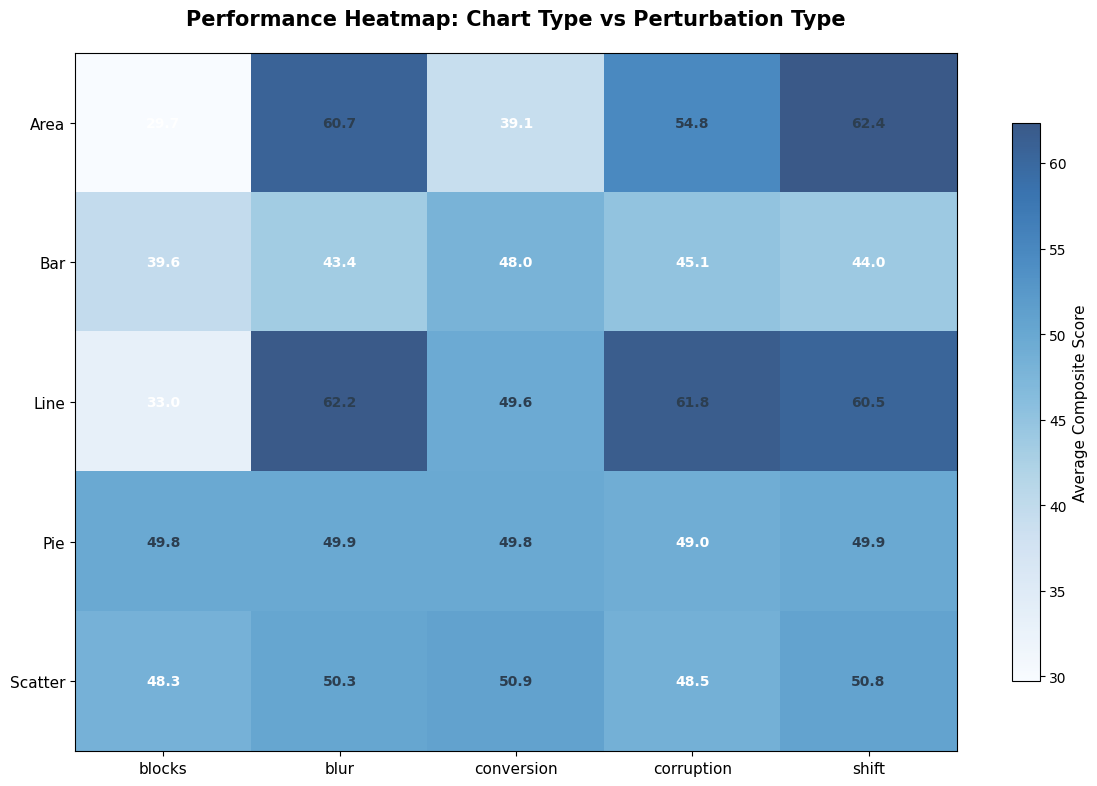


📊 CHART 2: Chart Type Vulnerability to Perturbations
-------------------------------------------------------

📊 CHART 3: Best/Worst Chart-Perturbation Combinations
-------------------------------------------------------


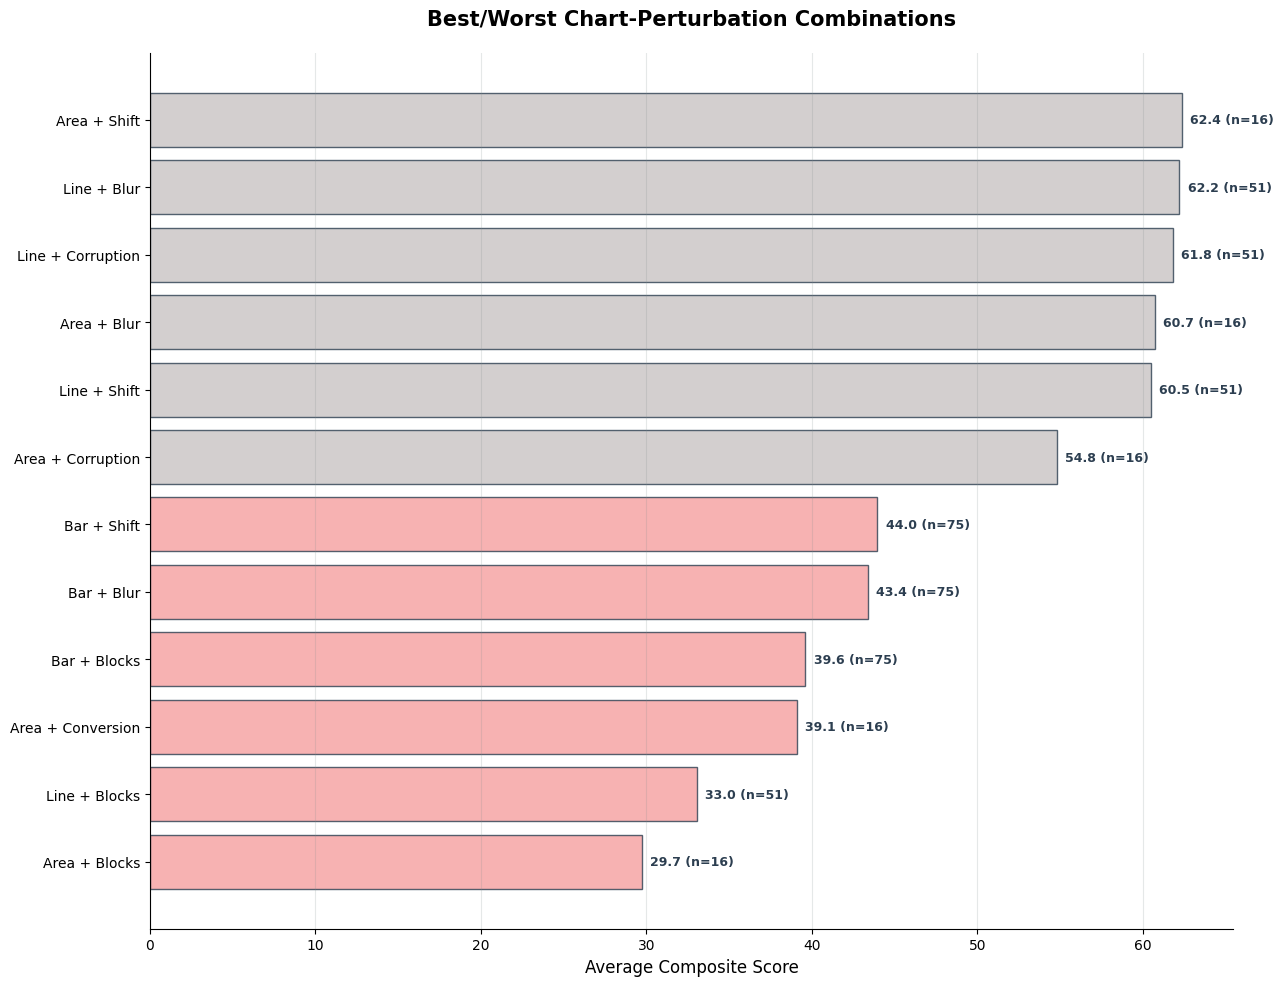


📊 CHART 4: Perturbation Effects Across Chart Types
--------------------------------------------------


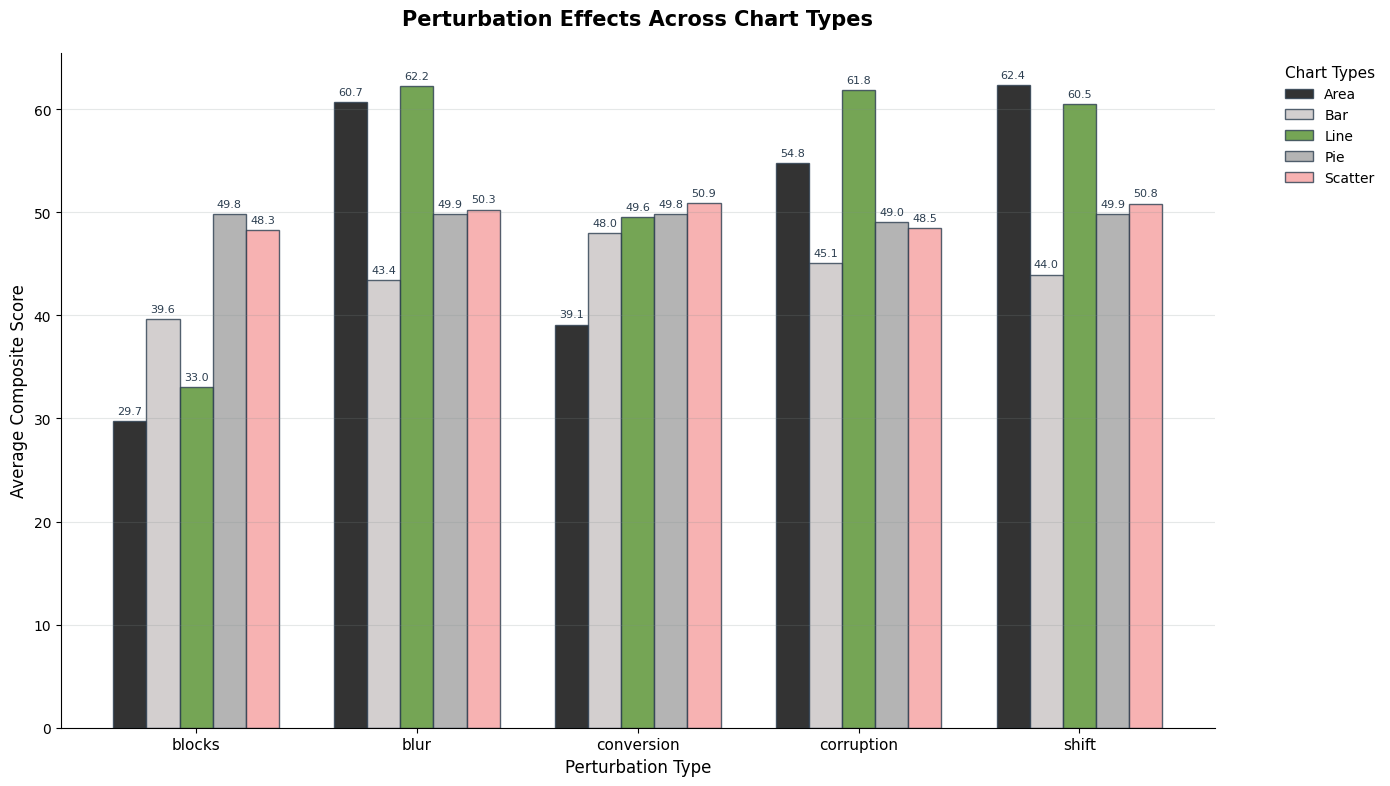


📊 CHART 5: Sample Size Matrix - Chart Type vs Perturbation Type
------------------------------------------------------------


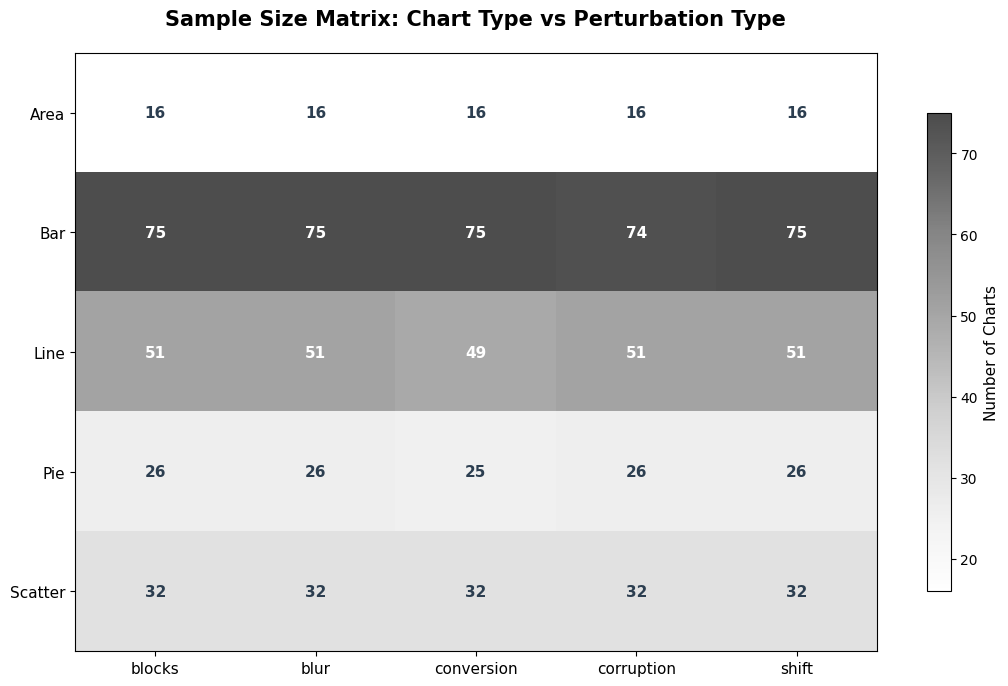

In [42]:
# Chart Type vs Perturbation Analysis - With Proper Color Palettes
print("CHART TYPE VS PERTURBATION ANALYSIS")
print("=" * 50)

# Color palettes from your image
grayscale_colors = ['#000000', '#595959', '#7f7f7f', '#a1a1a1', '#bababa', '#d4d4d4']
qualitative_colors = ['#000000', "#C9C4C4", "#538f2b", '#a1a1a1', "#f59f9f", "#6474bb"]
sequential_colors = ['#08519c', '#3182bd', '#6baed6', '#9ecae1', '#c6dbef', '#eff3ff']

# Choose which palette to use (change this line to switch palettes)
chosen_colors = qualitative_colors  # Change to: grayscale_colors or sequential_colors

# Only analyze if we have both chart types and perturbations
if not success_df['chart_type'].isna().all():
    perturbed_charts = success_df[success_df['is_orig_bool'] == False].copy()
    
    if len(perturbed_charts) > 0:
        
        # Chart 1: Performance Heatmap
        print("\n📊 CHART 1: Performance Heatmap - Chart Type vs Perturbation Type")
        print("-" * 65)
        
        cross_performance = perturbed_charts.groupby(['chart_type', 'perturbation_type'])['composite_score'].mean().unstack(fill_value=0)
        
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))
        
        im = ax.imshow(cross_performance.values, cmap='Blues', aspect='auto', alpha=0.8)
        
        ax.set_xticks(range(len(cross_performance.columns)))
        ax.set_yticks(range(len(cross_performance.index)))
        ax.set_xticklabels(cross_performance.columns, rotation=0, ha='center', fontsize=11, fontweight='500')
        ax.set_yticklabels([ct.title() for ct in cross_performance.index], fontsize=11, fontweight='500')
        ax.set_title('Performance Heatmap: Chart Type vs Perturbation Type', fontsize=15, fontweight='600', pad=20)
        
        cbar = plt.colorbar(im, ax=ax, shrink=0.8)
        cbar.set_label('Average Composite Score', fontsize=11, fontweight='500')
        
        # Add values to heatmap
        for i in range(len(cross_performance.index)):
            for j in range(len(cross_performance.columns)):
                value = cross_performance.iloc[i, j]
                if value > 0:
                    text_color = 'white' if value < cross_performance.values.mean() else '#2C3E50'
                    ax.text(j, i, f'{value:.1f}', ha="center", va="center", 
                           color=text_color, fontweight='600', fontsize=10)
        
        plt.tight_layout()
        plt.show()
        
        # Chart 2: Chart Type Vulnerability
        print("\n📊 CHART 2: Chart Type Vulnerability to Perturbations")
        print("-" * 55)
        
        chart_vulnerability = []
        for chart_type in success_df['chart_type'].dropna().unique():
            orig_score = success_df[(success_df['chart_type'] == chart_type) & 
                                  (success_df['is_orig_bool'] == True)]['composite_score'].mean()
            pert_score = success_df[(success_df['chart_type'] == chart_type) & 
                                  (success_df['is_orig_bool'] == False)]['composite_score'].mean()
            
            if not np.isnan(orig_score) and not np.isnan(pert_score):
                vulnerability = orig_score - pert_score
                chart_vulnerability.append((chart_type, vulnerability, orig_score, pert_score))
        
        if chart_vulnerability:
            chart_vulnerability.sort(key=lambda x: x[1], reverse=True)
            
            fig, ax = plt.subplots(1, 1, figsize=(11, 8))
            
            chart_names = [cv[0].title() for cv in chart_vulnerability]
            vulnerabilities = [cv[1] for cv in chart_vulnerability]
            
            # Use chosen colors for positive/negative values
            bar_colors = [chosen_colors[0] if v > 0 else chosen_colors[2] for v in vulnerabilities]
            
            bars = ax.bar(range(len(chart_vulnerability)), vulnerabilities,
                         color=bar_colors, alpha=0.8, edgecolor='#2C3E50', linewidth=1)
            
            ax.set_xticks(range(len(chart_vulnerability)))
            ax.set_xticklabels(chart_names, rotation=0, ha='center', fontsize=11, fontweight='500')
            ax.set_ylabel('Performance Drop (Original - Perturbed)', fontsize=12, fontweight='500')
            ax.set_title('Chart Type Vulnerability to Perturbations', fontsize=15, fontweight='600', pad=20)
            ax.axhline(y=0, color='#2C3E50', linestyle='-', alpha=0.7, linewidth=1)
            ax.grid(True, alpha=0.2, axis='y', color='#7F8C8D')
            
            # Add value labels
            for i, (bar, vuln) in enumerate(zip(bars, vulnerabilities)):
                height = bar.get_height()
                label_y = height + (0.2 if height >= 0 else -0.3)
                ax.text(bar.get_x() + bar.get_width()/2., label_y,
                       f'{vuln:.2f}', ha='center', 
                       va='bottom' if height >= 0 else 'top',
                       fontweight='600', fontsize=10, color='#2C3E50')
            
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            
            plt.tight_layout()
            plt.show()
        
        # Chart 3: Best/Worst Combinations
        print("\n📊 CHART 3: Best/Worst Chart-Perturbation Combinations")
        print("-" * 55)
        
        combo_performance = perturbed_charts.groupby(['chart_type', 'perturbation_type'])['composite_score'].agg(['mean', 'count']).reset_index()
        combo_performance = combo_performance[combo_performance['count'] >= 3]
        combo_performance = combo_performance.sort_values('mean', ascending=True)
        
        if len(combo_performance) > 0:
            fig, ax = plt.subplots(1, 1, figsize=(13, 10))
            
            n_show = min(12, len(combo_performance))
            if len(combo_performance) > n_show:
                worst_n = n_show // 2
                best_n = n_show - worst_n
                selected_combos = pd.concat([
                    combo_performance.head(worst_n),
                    combo_performance.tail(best_n)
                ])
            else:
                selected_combos = combo_performance
            
            selected_combos['combo'] = selected_combos['chart_type'].str.title() + ' + ' + selected_combos['perturbation_type'].str.title()
            
            # Use chosen colors for gradient effect
            colors_gradient = []
            for i, score in enumerate(selected_combos['mean'].values):
                if i < len(selected_combos) // 2:
                    colors_gradient.append(chosen_colors[4])  # Lighter for worst
                else:
                    colors_gradient.append(chosen_colors[1])  # Darker for best
            
            bars = ax.barh(range(len(selected_combos)), selected_combos['mean'].values,
                          color=colors_gradient, alpha=0.8, edgecolor='#2C3E50', linewidth=1)
            
            ax.set_yticks(range(len(selected_combos)))
            ax.set_yticklabels(selected_combos['combo'].values, fontsize=10, fontweight='500')
            ax.set_xlabel('Average Composite Score', fontsize=12, fontweight='500')
            ax.set_title('Best/Worst Chart-Perturbation Combinations', fontsize=15, fontweight='600', pad=20)
            ax.grid(True, alpha=0.2, axis='x', color='#7F8C8D')
            
            # Add value labels
            for i, (bar, mean_val, count) in enumerate(zip(bars, selected_combos['mean'].values, selected_combos['count'].values)):
                ax.text(mean_val + 0.5, bar.get_y() + bar.get_height()/2, 
                       f'{mean_val:.1f} (n={count})', va='center', ha='left',
                       fontsize=9, fontweight='600', color='#2C3E50')
            
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            
            plt.tight_layout()
            plt.show()
        
        # Chart 4: Perturbation Effects Across Chart Types
        print("\n📊 CHART 4: Perturbation Effects Across Chart Types")
        print("-" * 50)
        
        if len(cross_performance) > 0:
            fig, ax = plt.subplots(1, 1, figsize=(14, 8))
            
            perturbation_effect = cross_performance.T
            
            x_pos = np.arange(len(perturbation_effect.index))
            width = 0.15
            
            # Use chosen colors for different chart types
            for i, chart_type in enumerate(perturbation_effect.columns):
                offset = (i - len(perturbation_effect.columns)/2 + 0.5) * width
                color_index = i % len(chosen_colors)  # Cycle through colors if more chart types
                bars = ax.bar(x_pos + offset, perturbation_effect[chart_type].values,
                             width, label=chart_type.title(), alpha=0.8,
                             color=chosen_colors[color_index], edgecolor='#2C3E50', linewidth=1)
                
                # Add value labels on bars
                for bar in bars:
                    height = bar.get_height()
                    if height > 0:
                        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                               f'{height:.1f}', ha='center', va='bottom',
                               fontsize=8, fontweight='500', color='#2C3E50', rotation=0)
            
            ax.set_xlabel('Perturbation Type', fontsize=12, fontweight='500')
            ax.set_ylabel('Average Composite Score', fontsize=12, fontweight='500')
            ax.set_title('Perturbation Effects Across Chart Types', fontsize=15, fontweight='600', pad=20)
            ax.set_xticks(x_pos)
            ax.set_xticklabels(perturbation_effect.index, rotation=0, ha='center', fontsize=11, fontweight='500')
            ax.legend(title='Chart Types', bbox_to_anchor=(1.05, 1), loc='upper left', 
                     fontsize=10, title_fontsize=11, frameon=False)
            ax.grid(True, alpha=0.2, axis='y', color='#7F8C8D')
            
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            
            plt.tight_layout()
            plt.show()
        
        # Chart 5: Sample Size Matrix
        print("\n📊 CHART 5: Sample Size Matrix - Chart Type vs Perturbation Type")
        print("-" * 60)
        
        cross_counts = perturbed_charts.groupby(['chart_type', 'perturbation_type']).size().unstack(fill_value=0)
        
        fig, ax = plt.subplots(1, 1, figsize=(11, 7))
        
        im = ax.imshow(cross_counts.values, cmap='Greys', aspect='auto', alpha=0.7)
        
        ax.set_xticks(range(len(cross_counts.columns)))
        ax.set_yticks(range(len(cross_counts.index)))
        ax.set_xticklabels(cross_counts.columns, rotation=0, ha='center', fontsize=11, fontweight='500')
        ax.set_yticklabels([ct.title() for ct in cross_counts.index], fontsize=11, fontweight='500')
        ax.set_title('Sample Size Matrix: Chart Type vs Perturbation Type', fontsize=15, fontweight='600', pad=20)
        
        cbar = plt.colorbar(im, ax=ax, shrink=0.8)
        cbar.set_label('Number of Charts', fontsize=11, fontweight='500')
        
        # Add count values
        for i in range(len(cross_counts.index)):
            for j in range(len(cross_counts.columns)):
                count = cross_counts.iloc[i, j]
                if count > 0:
                    text_color = 'white' if count > cross_counts.values.mean() else '#2C3E50'
                    ax.text(j, i, str(count), ha="center", va="center", 
                           color=text_color, fontweight='600', fontsize=11)
        
        plt.tight_layout()
        plt.show()

else:
    print("Chart type information not available for detailed analysis.")